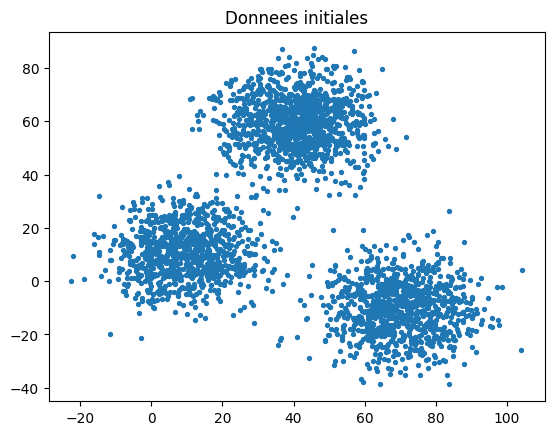

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import AgglomerativeClustering

# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
# [-1.51369 , 0.265446],
# [-1.60321 , 0.362039], .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster. On retire cette information
path = "./artificial/"

databrut = arff.loadarff(open(path+"xclara.arff", "r"))
# print(databrut)
datanp = [[x[0],x[1]] for x in databrut[0]]
# print(datanp)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
plt.show()

## 3. Clustering agglomératif

### 3.1 Pour démarrer

Le code ci-dessous permet d’afficher un dendrogramme (il y a d’autres possibilités ...) avec la méthode d’agglomération de clusters single.

Dendrogramme 'single' donnees initiales


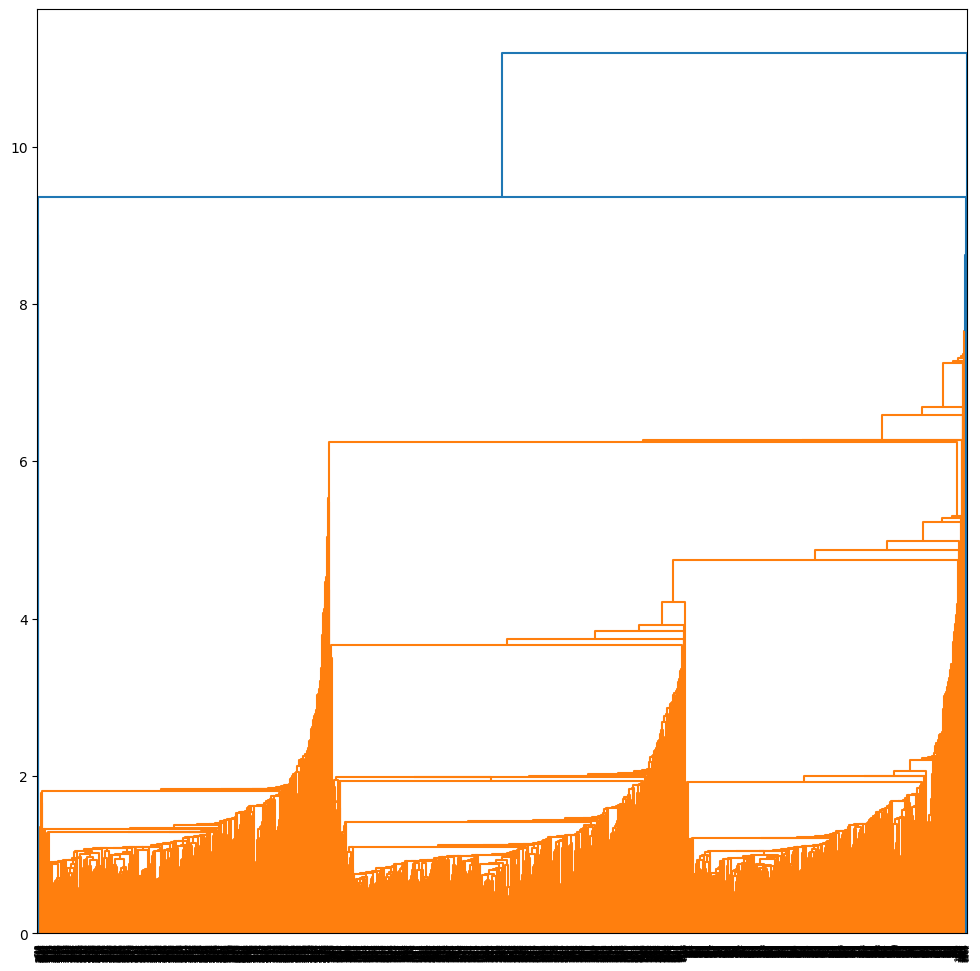

In [3]:
import scipy.cluster.hierarchy as shc

databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

# Donnees dans datanp
print ("Dendrogramme 'single' donnees initiales")
linked_mat = shc.linkage ( datanp , 'single')
plt.figure ( figsize =( 12 , 12 ) )
shc.dendrogram ( linked_mat ,
    orientation ='top',
    distance_sort ='descending',
    show_leaf_counts = False )
plt.show ()

Le code suivant permet de déterminer un clustering hiérarchique en utilisant soit une limite sur le seuil de distance soit un nombre de clusters

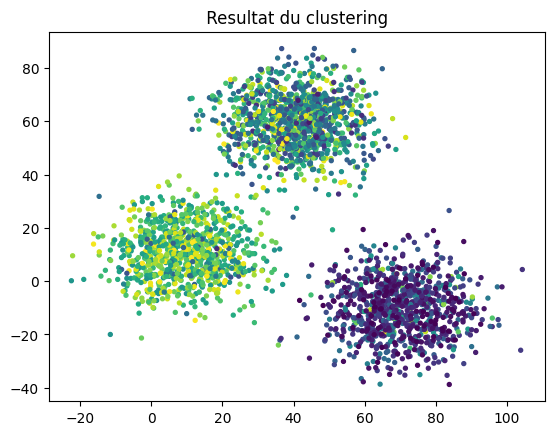

nb clusters = 3000 , nb feuilles =  3000  runtime =  82.27 ms


In [4]:
from sklearn import metrics
from sklearn import cluster

# set distance_threshold (0 ensures we compute the full tree )
tps1 = time.time ()
model = cluster.AgglomerativeClustering (distance_threshold=0, linkage ='single', n_clusters = None )
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Resultat du clustering ")
plt.show ()
print ("nb clusters =", k ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

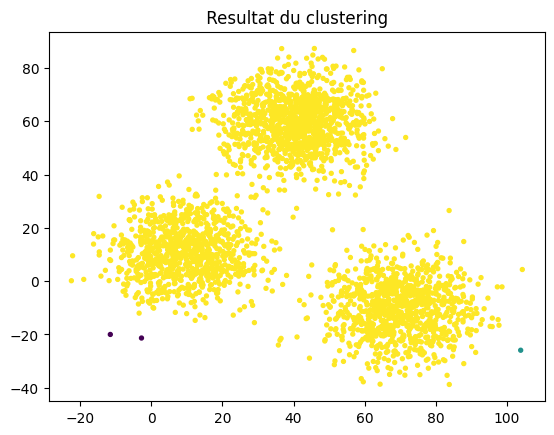

nb clusters = 3 , nb feuilles =  3000  runtime =  55.06 ms


In [5]:

# set the number of clusters
k=3
tps1 = time.time ()
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_


# Affichage clustering
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Resultat du clustering ")
plt.show ()
print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

##  Intérêts de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering aggomératif devrait identifier correctement les clusters.

Appliquez itérativement la méthode de clustering agglomératif en faisant varier le seuil de distance afin de déterminer une bonne solution de clustering à l'aide des métriques d'évaluation

Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l'option connectivity est laissée à none.

Mesurez le temps de calcul

Arrivez-vous à retrouver le résultat attendu à l'aide de ces critères d'évaluation ?


 ------------------
twenty.arff

 ---> seuil_distance =  1
Dendrogramme 'single' donnees initiales


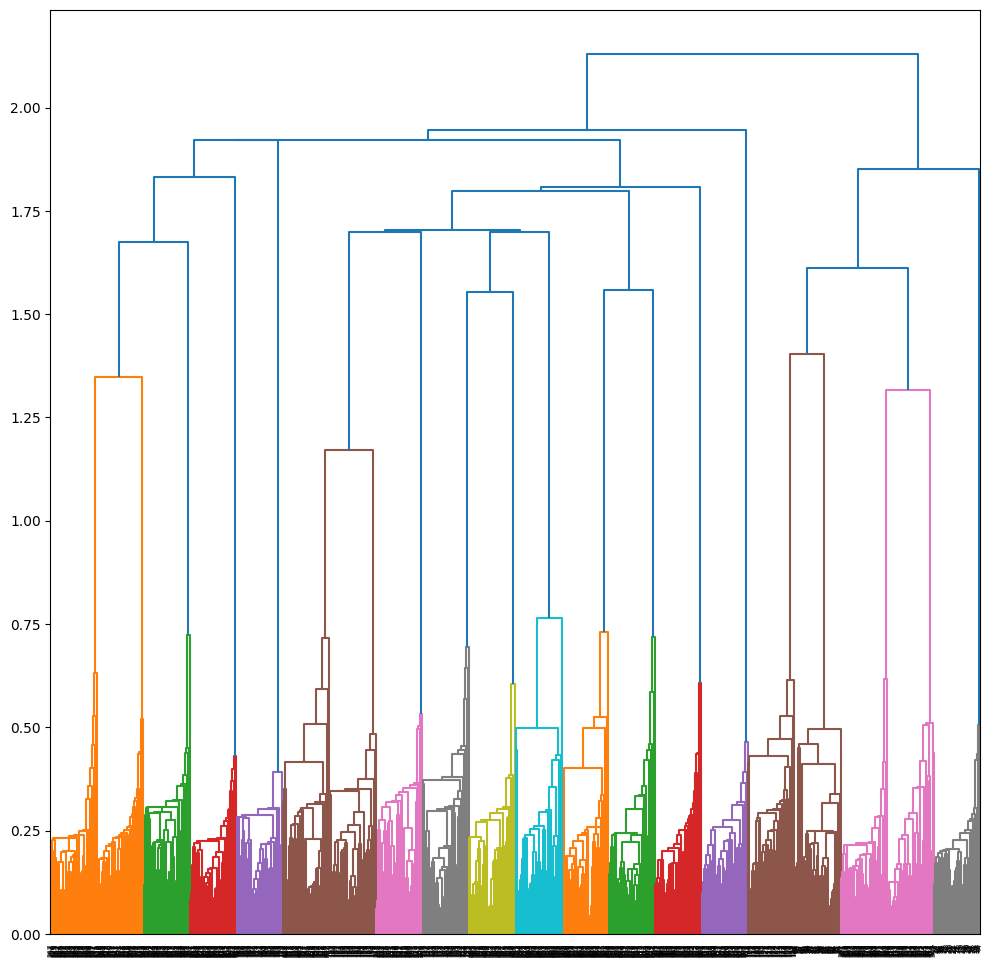

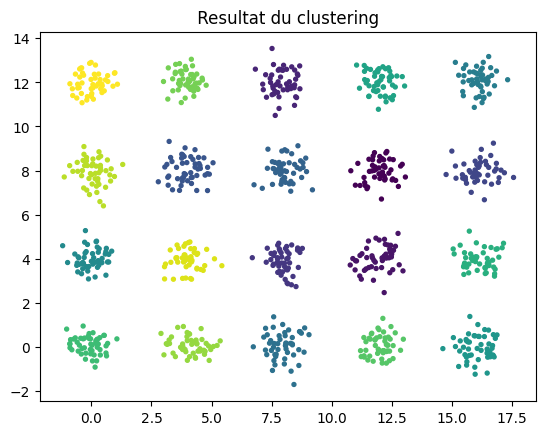

nb clusters = 20 , nb feuilles =  1000  runtime =  6.61 ms

 ---> seuil_distance =  10
Dendrogramme 'single' donnees initiales


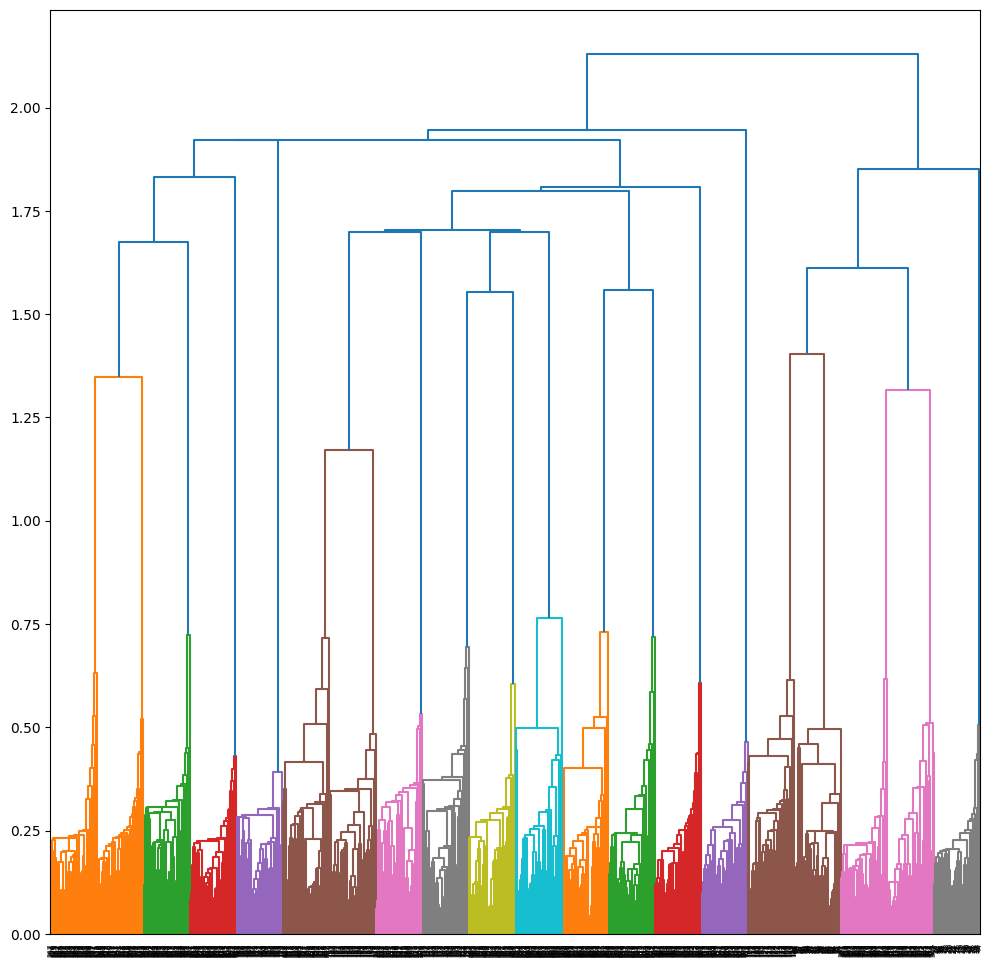

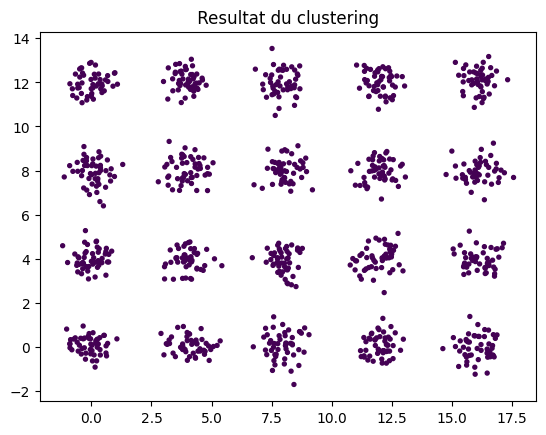

nb clusters = 1 , nb feuilles =  1000  runtime =  6.62 ms

 ---> seuil_distance =  100
Dendrogramme 'single' donnees initiales


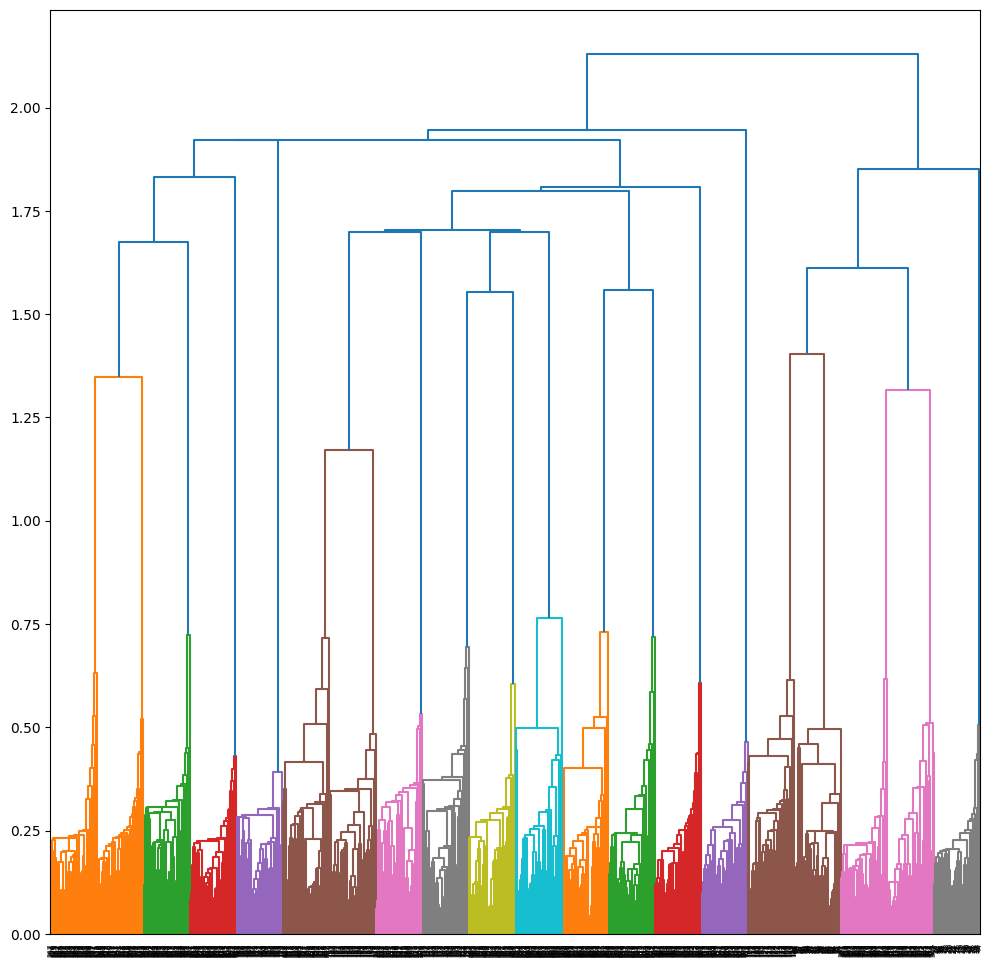

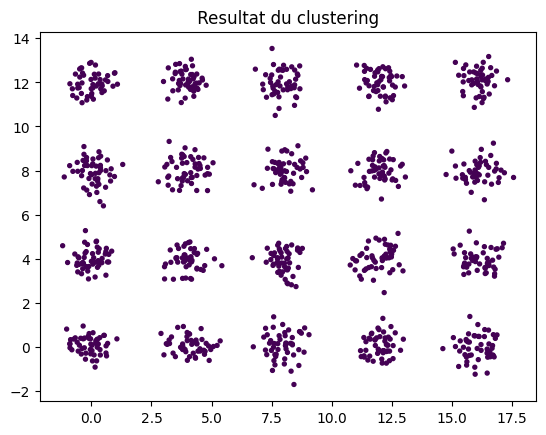

nb clusters = 1 , nb feuilles =  1000  runtime =  6.85 ms

 ------------------
spiral.arff

 ---> seuil_distance =  1
Dendrogramme 'single' donnees initiales


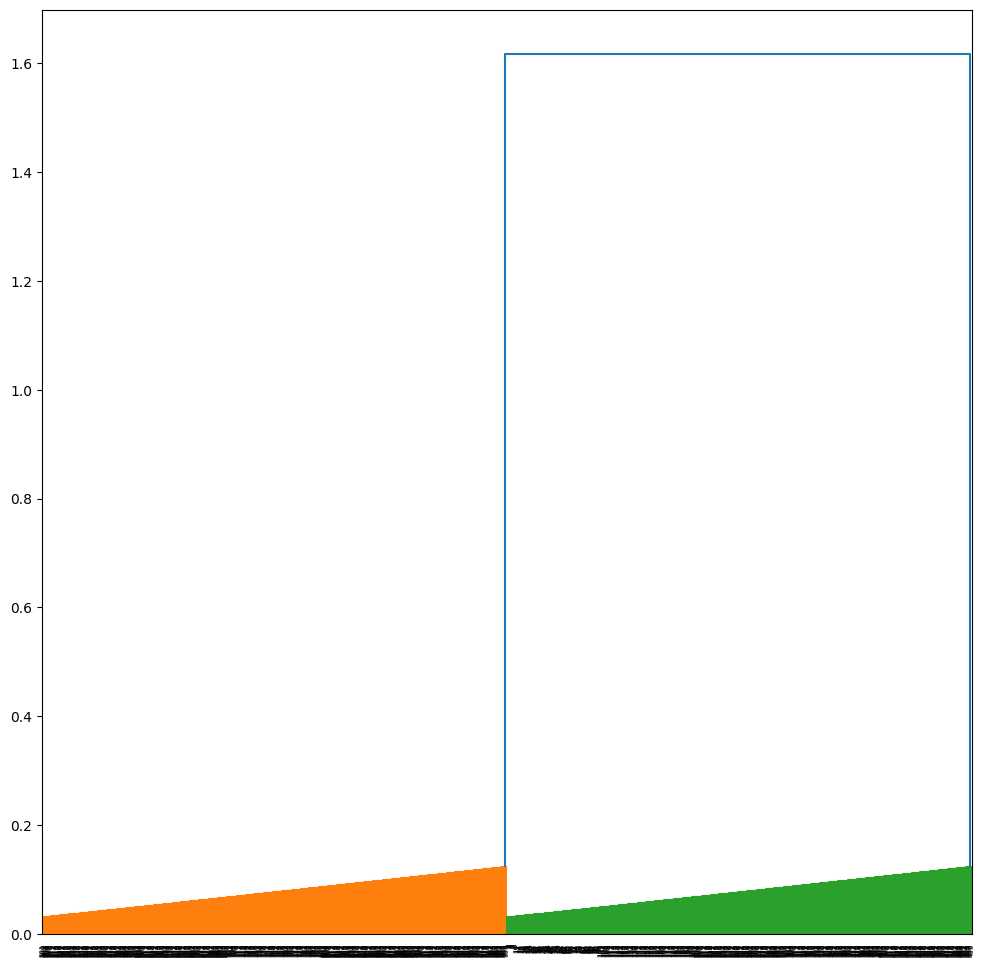

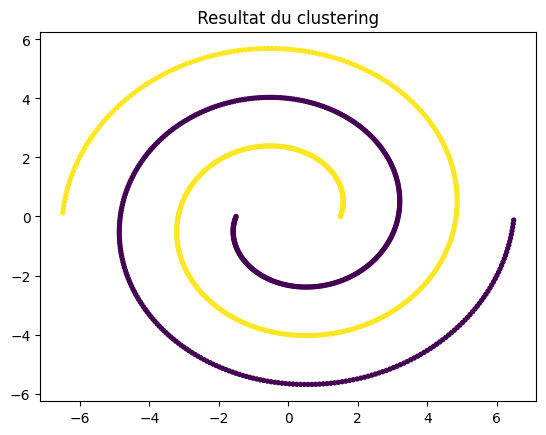

nb clusters = 2 , nb feuilles =  1000  runtime =  6.98 ms

 ---> seuil_distance =  10
Dendrogramme 'single' donnees initiales


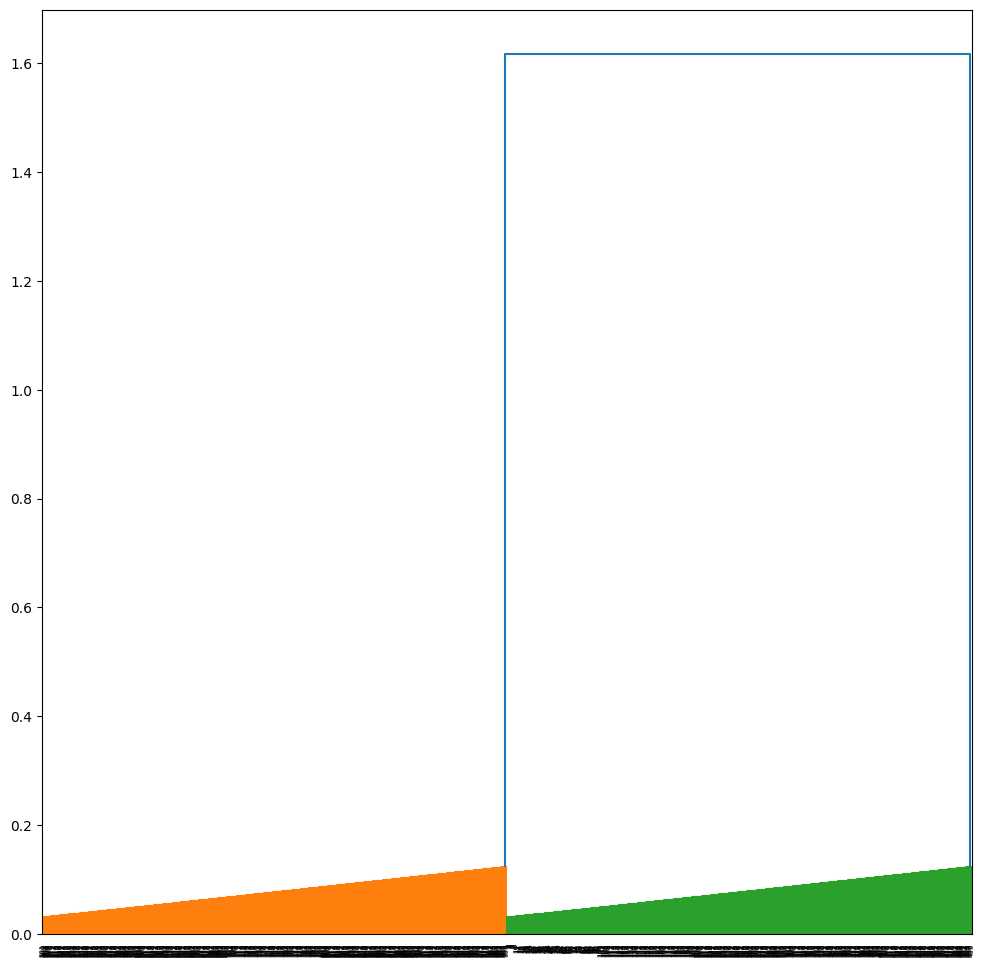

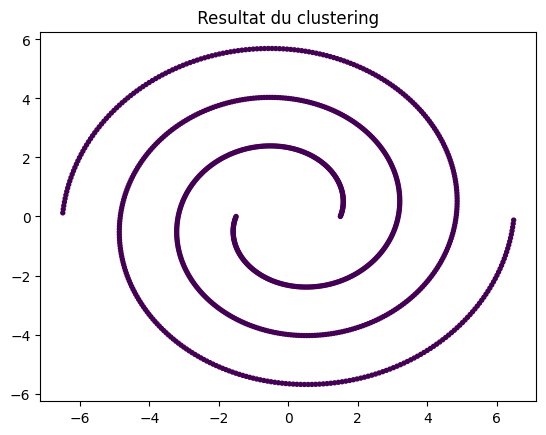

nb clusters = 1 , nb feuilles =  1000  runtime =  6.82 ms

 ---> seuil_distance =  100
Dendrogramme 'single' donnees initiales


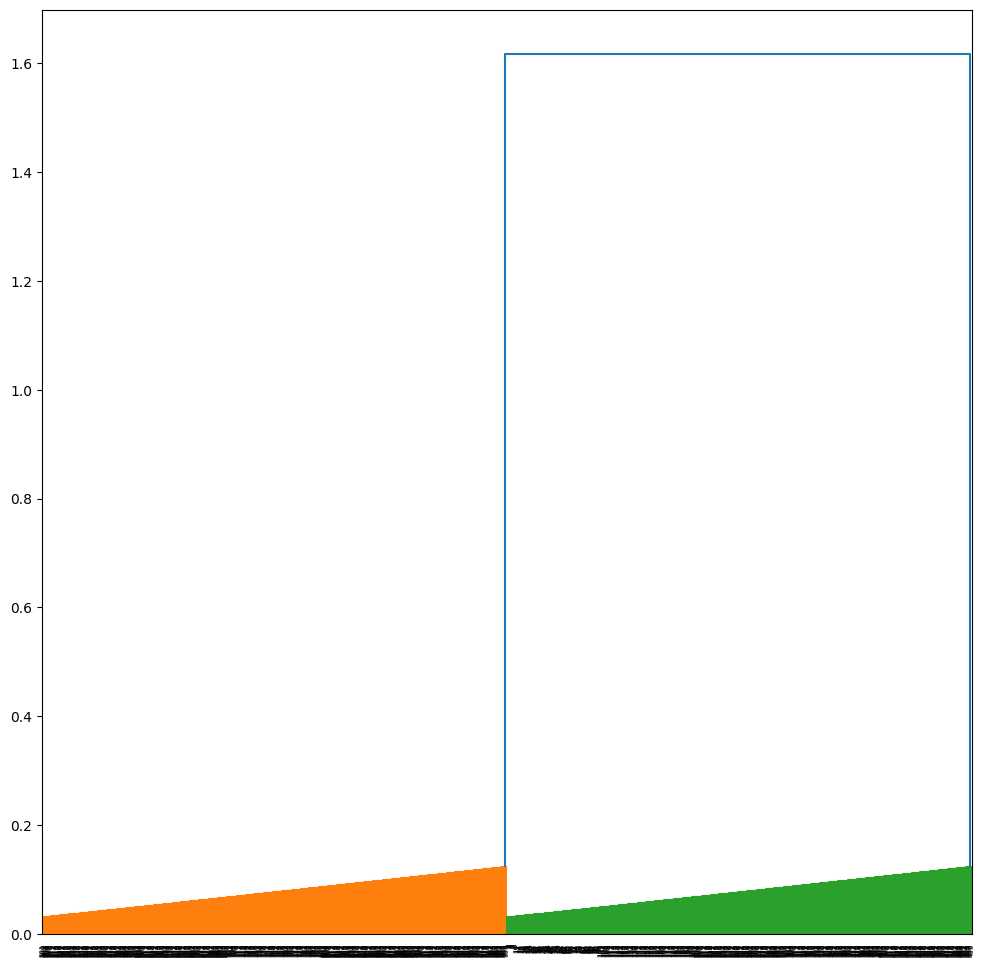

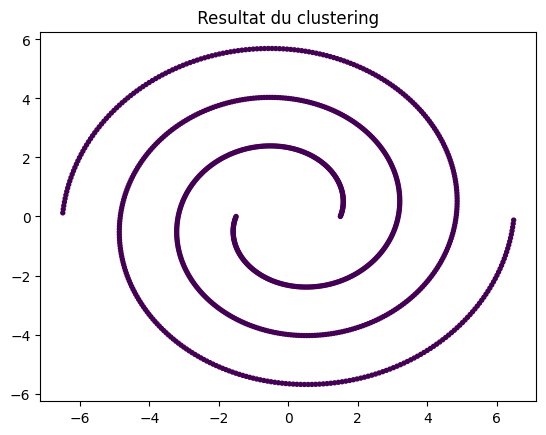

nb clusters = 1 , nb feuilles =  1000  runtime =  6.33 ms


In [6]:
import scipy.cluster.hierarchy as shc
import time as time

dic = {"twenty.arff": [20, [1,10,100]], "spiral.arff": [2, [1,10,100]]}

seuil_distance_list = [1,10,100,1000]

for key in dic:
    print("\n ------------------")
    print(key)
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    # f0 tous les éléments de la première colonne de datanp
    # f1 tous les éléments de la deuxième colonne de datanp
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    for seuil_distance in dic[key][1]:
        print("\n ---> seuil_distance = ", seuil_distance)
        # Donnees dans datanp
        print ("Dendrogramme 'single' donnees initiales")
        linked_mat = shc.linkage ( datanp , 'single')
        plt.figure ( figsize =( 12 , 12 ) )
        
        shc.dendrogram ( 
            linked_mat ,
            orientation ='top',
            distance_sort ='descending',
            show_leaf_counts = False 
        )

        plt.show ()


        # set the number of clusters
        k=dic[key][0]
        tps1 = time.time ()
        model = cluster.AgglomerativeClustering (distance_threshold=seuil_distance, linkage ='single', n_clusters=None)
        model = model.fit (datanp)
        tps2 = time.time ()
        labels = model.labels_
        kres = model.n_clusters_
        leaves = model.n_leaves_


        # Affichage clustering
        plt.scatter (f0,f1 , c=labels , s=8 )
        plt.title (" Resultat du clustering ")
        plt.show ()

        # Mesurez le temps de calcul
        print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

# Arrivez-vous à retrouver le résultat attendu à l'aide de ces critères d'évaluation ?
# Oui, on retrouve bien le résultat attendu à l'aide de ces critères d'évaluation.


 ------------------
twenty.arff

 ---> Cluster manière de combiner =  single
Dendrogramme 'single' donnees initiales


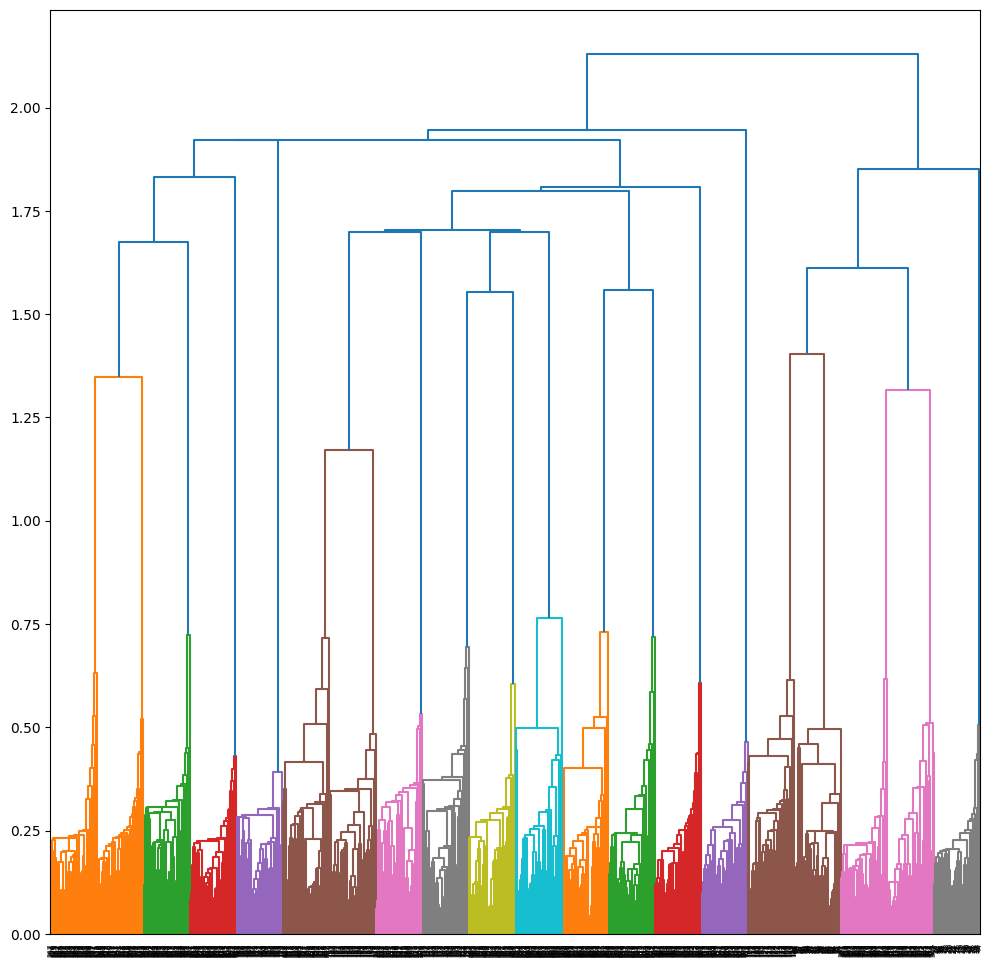

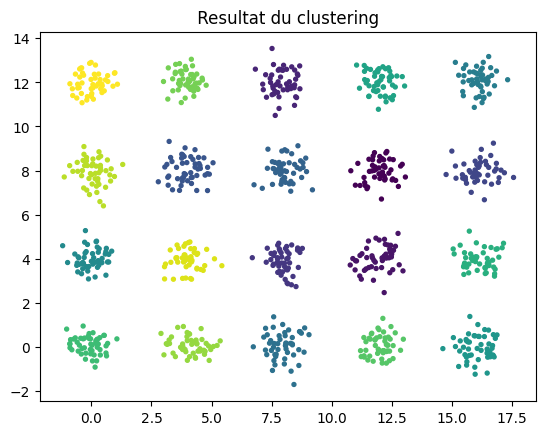

nb clusters = 20 , nb feuilles =  1000  runtime =  8.74 ms

 ---> Cluster manière de combiner =  average
Dendrogramme 'single' donnees initiales


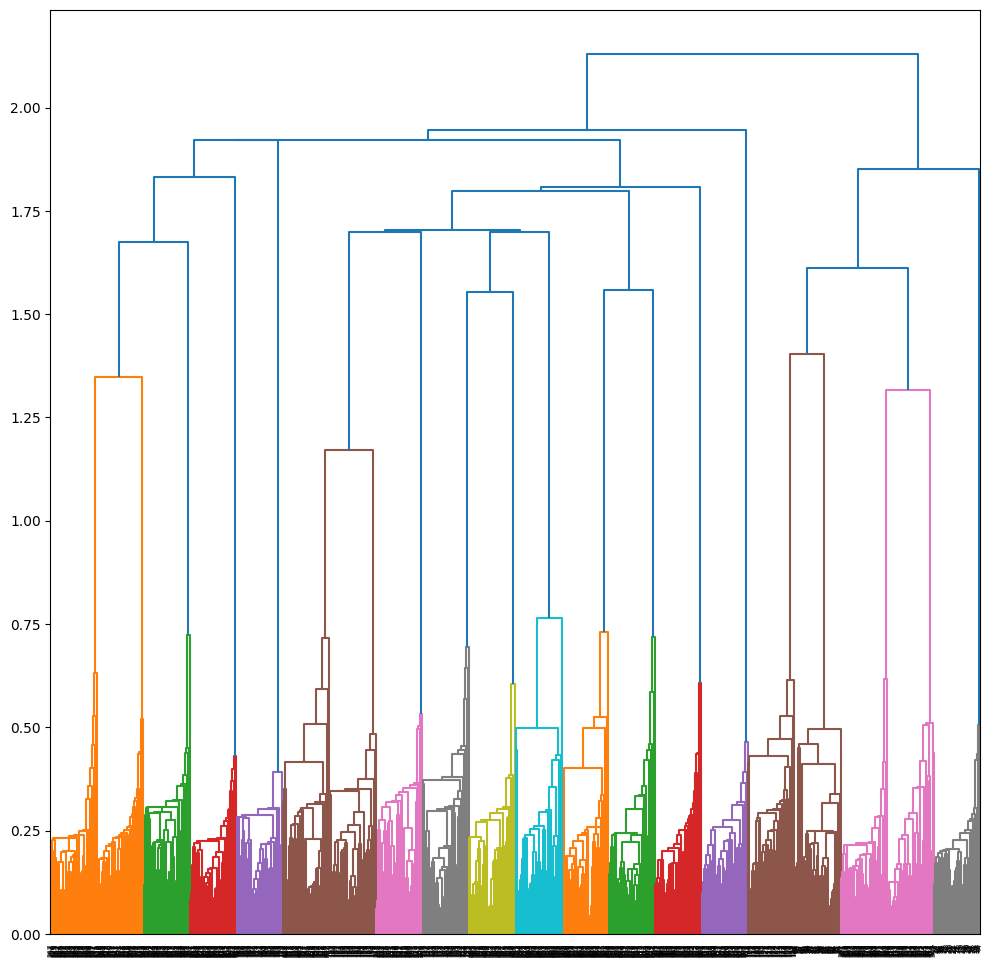

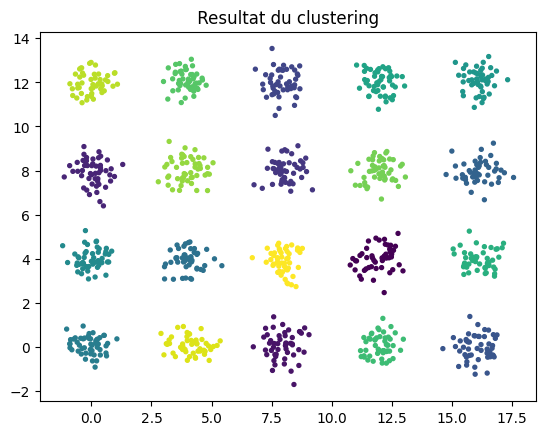

nb clusters = 20 , nb feuilles =  1000  runtime =  14.25 ms

 ---> Cluster manière de combiner =  complete
Dendrogramme 'single' donnees initiales


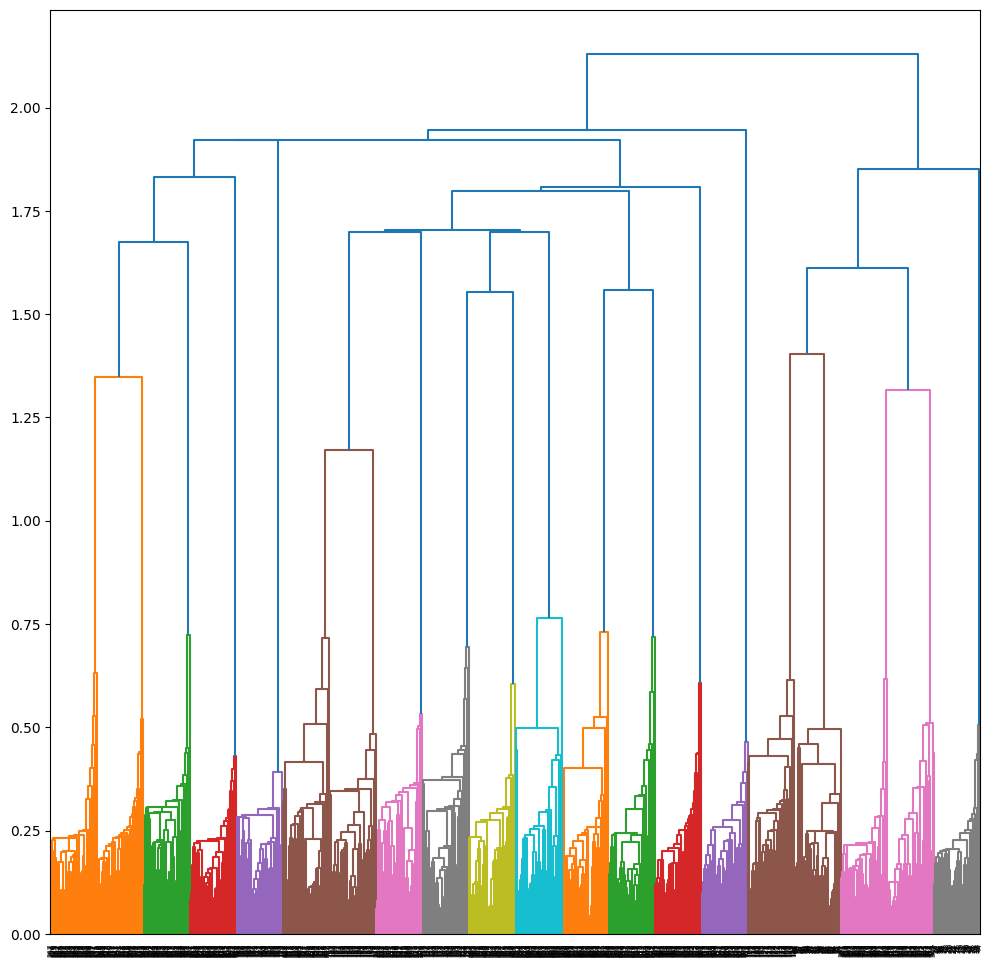

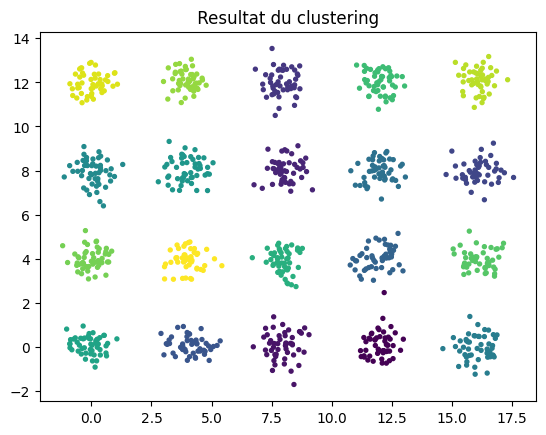

nb clusters = 20 , nb feuilles =  1000  runtime =  14.69 ms

 ---> Cluster manière de combiner =  ward
Dendrogramme 'single' donnees initiales


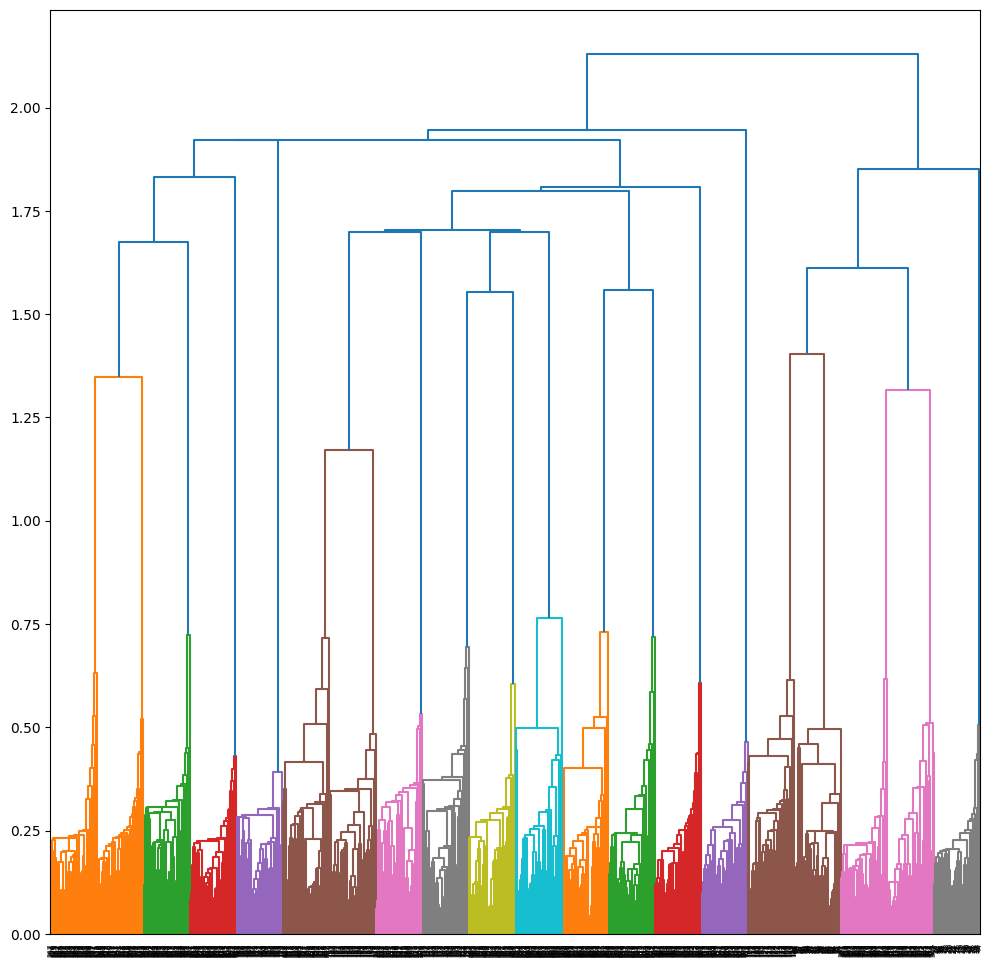

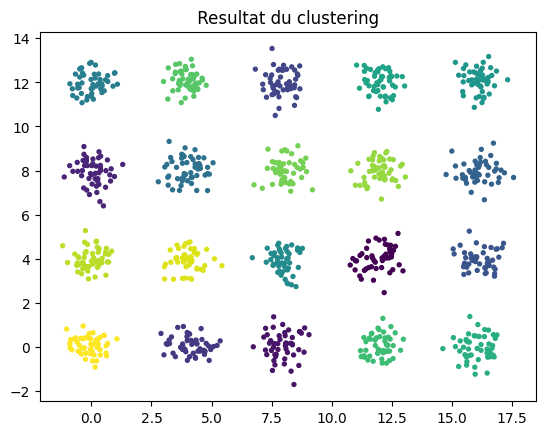

nb clusters = 20 , nb feuilles =  1000  runtime =  18.89 ms

 ------------------
spiral.arff

 ---> Cluster manière de combiner =  single
Dendrogramme 'single' donnees initiales


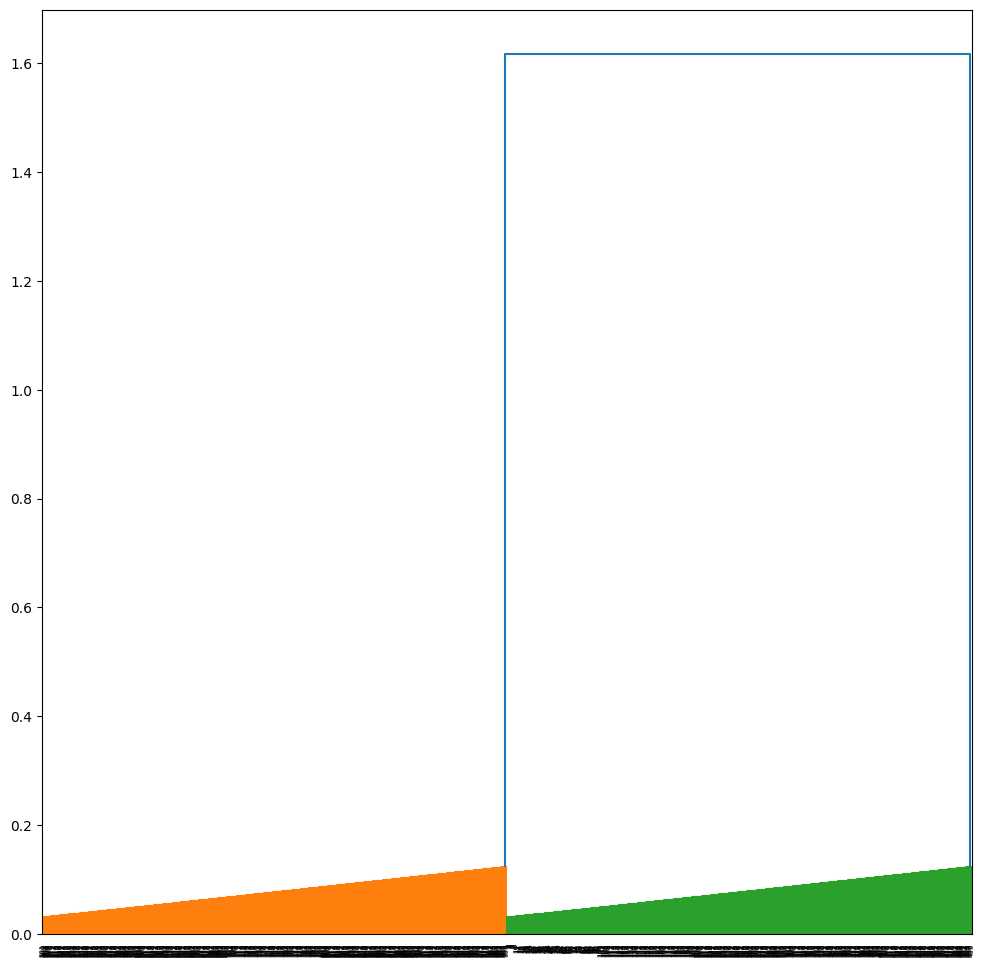

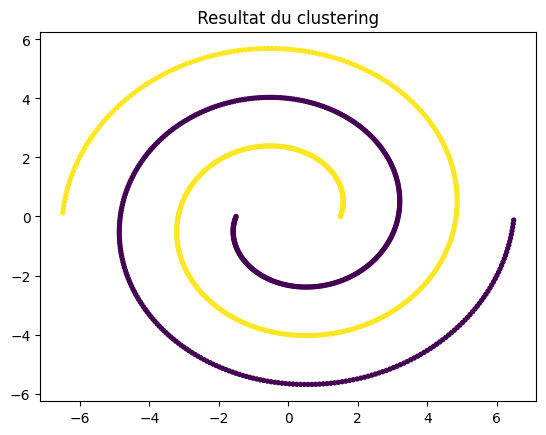

nb clusters = 2 , nb feuilles =  1000  runtime =  7.57 ms

 ---> Cluster manière de combiner =  average
Dendrogramme 'single' donnees initiales


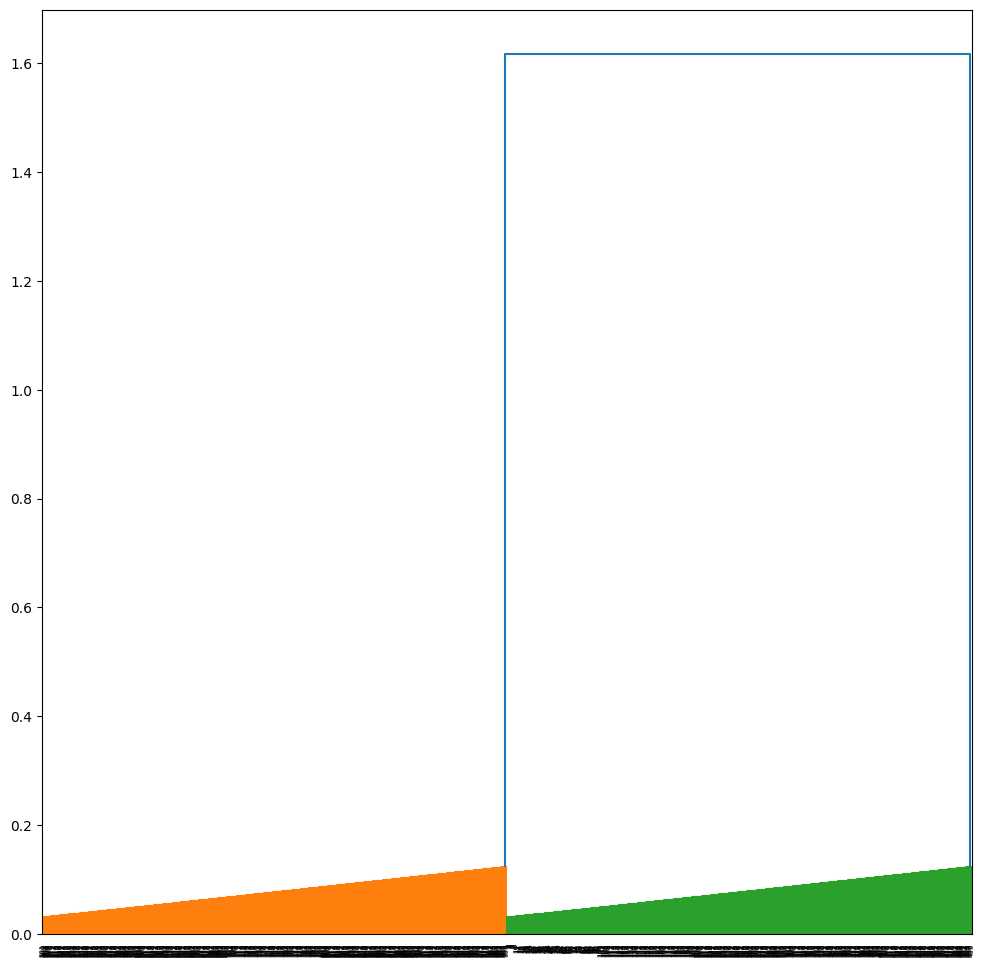

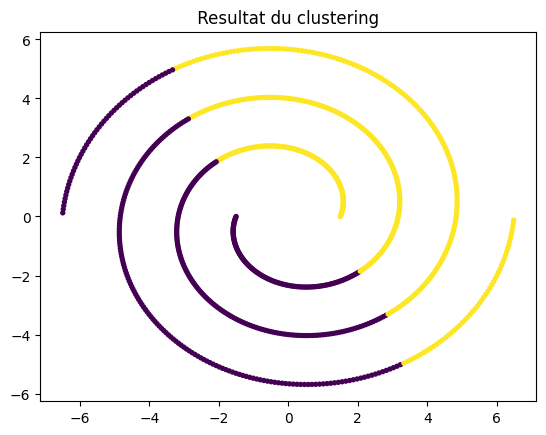

nb clusters = 2 , nb feuilles =  1000  runtime =  14.92 ms

 ---> Cluster manière de combiner =  complete
Dendrogramme 'single' donnees initiales


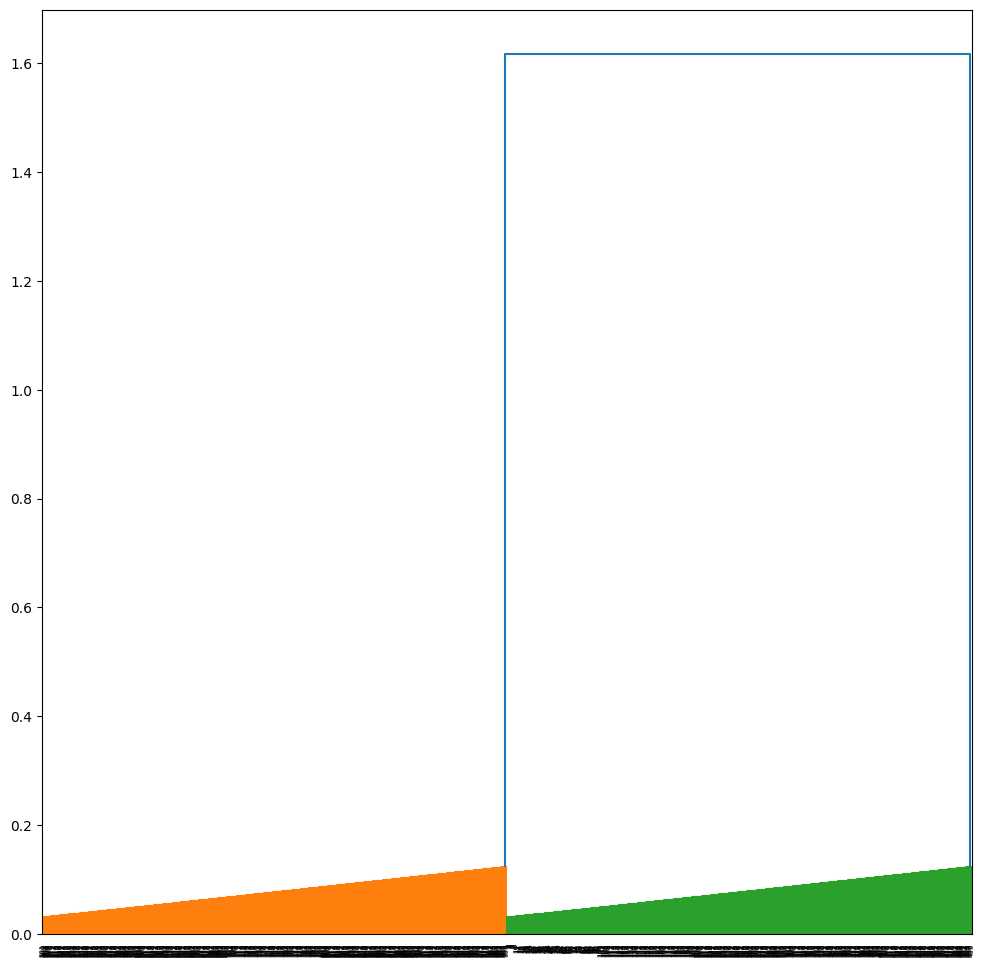

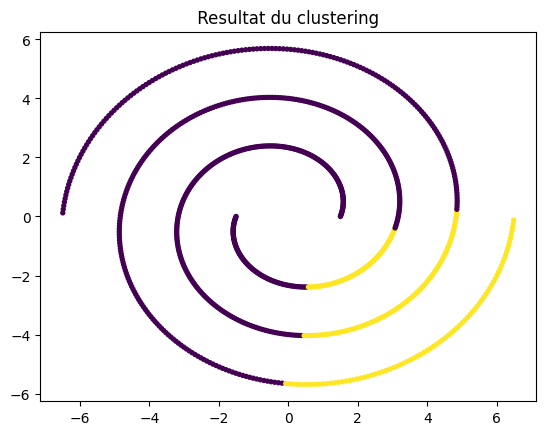

nb clusters = 2 , nb feuilles =  1000  runtime =  27.06 ms

 ---> Cluster manière de combiner =  ward
Dendrogramme 'single' donnees initiales


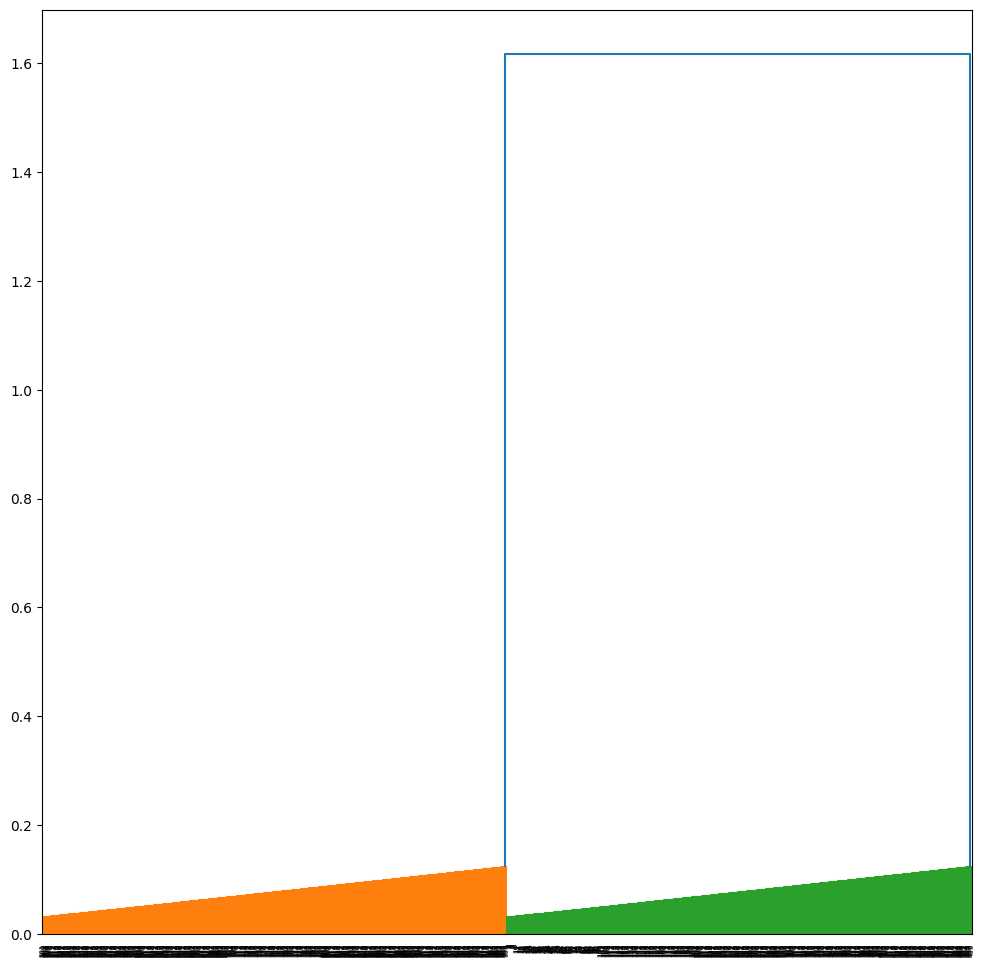

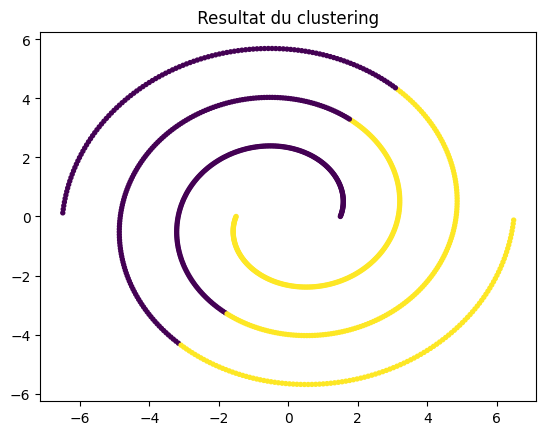

nb clusters = 2 , nb feuilles =  1000  runtime =  43.14 ms


In [15]:
#Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l'option connectivity est laissée à none.

import scipy.cluster.hierarchy as shc

dic = {"twenty.arff": [20, ['single', 'average', 'complete', 'ward']], "spiral.arff": [2,['single', 'average', 'complete', 'ward']]}

for key in dic:
    print("\n ------------------")
    print(key)
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    # f0 tous les éléments de la première colonne de datanp
    # f1 tous les éléments de la deuxième colonne de datanp
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    for cluster_way in dic[key][1]:
        print("\n ---> Cluster manière de combiner = ", cluster_way)
        # Donnees dans datanp
        print ("Dendrogramme "+cluster_way+" donnees initiales")
        linked_mat = shc.linkage ( datanp , 'single')
        plt.figure (figsize = (12,12))
        shc.dendrogram (linked_mat,
            orientation ='top',
            distance_sort ='descending',
            show_leaf_counts = False 
        )
        plt.show ()


        # set the number of clusters
        k=dic[key][0]
        tps1 = time.time ()
        model = cluster.AgglomerativeClustering (linkage=cluster_way, n_clusters=k)
        model = model.fit (datanp)
        tps2 = time.time ()
        labels = model.labels_
        kres = model.n_clusters_
        leaves = model.n_leaves_


        # Affichage clustering
        plt.scatter (f0, f1, c=labels , s=8 )
        plt.title (" Resultat du clustering ")
        plt.show ()
        print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")


Vous avez automatiser votre code ? Recommencez en faisant varier le nombre de clusters


 ------------------
banana.arff

 ---> k =  2
Dendrogramme 'single' donnees initiales


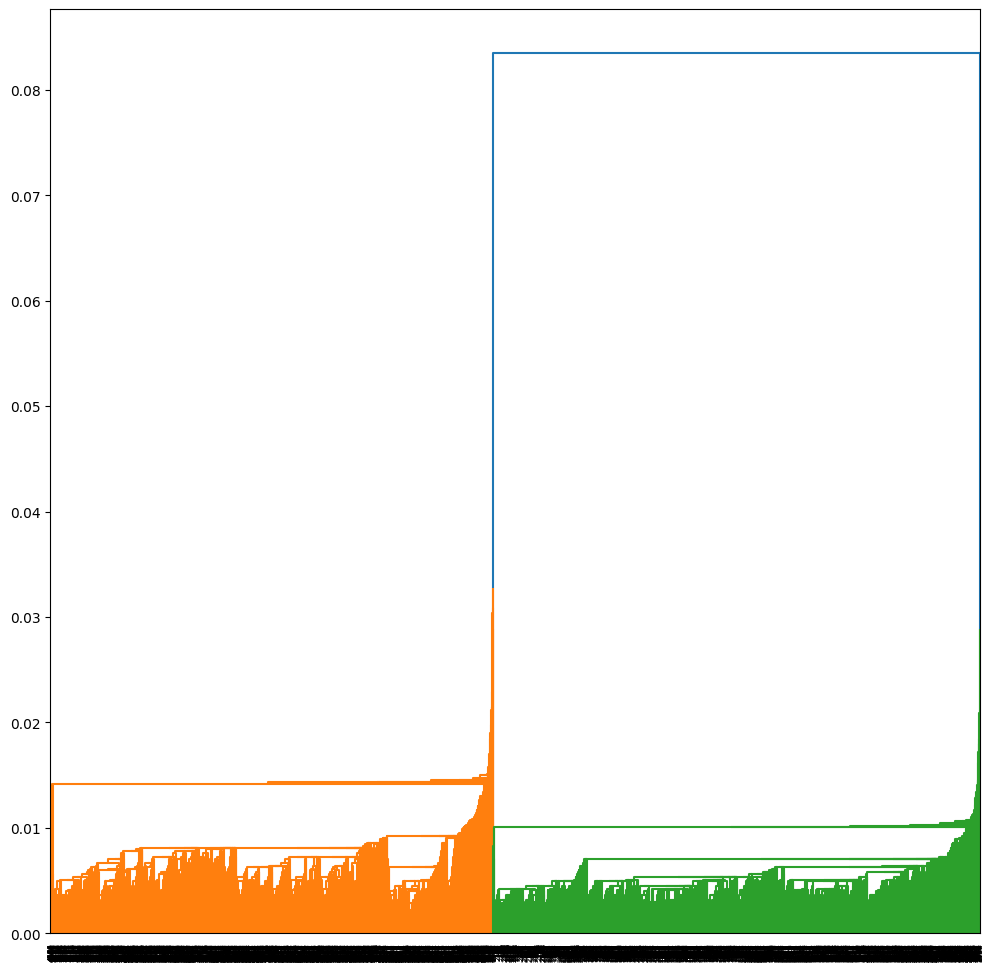

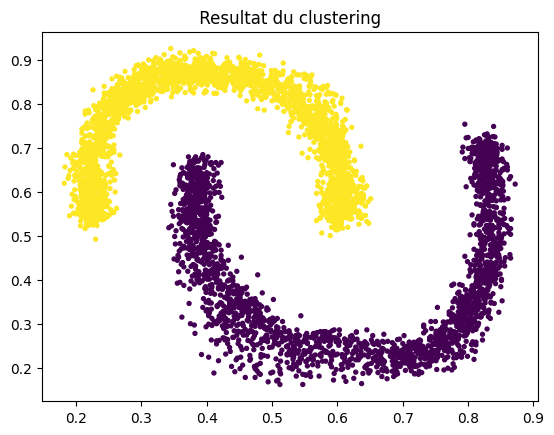

nb clusters = 2 , nb feuilles =  4811  runtime =  111.81 ms

 ------------------
banana.arff

 ---> k =  3
Dendrogramme 'single' donnees initiales


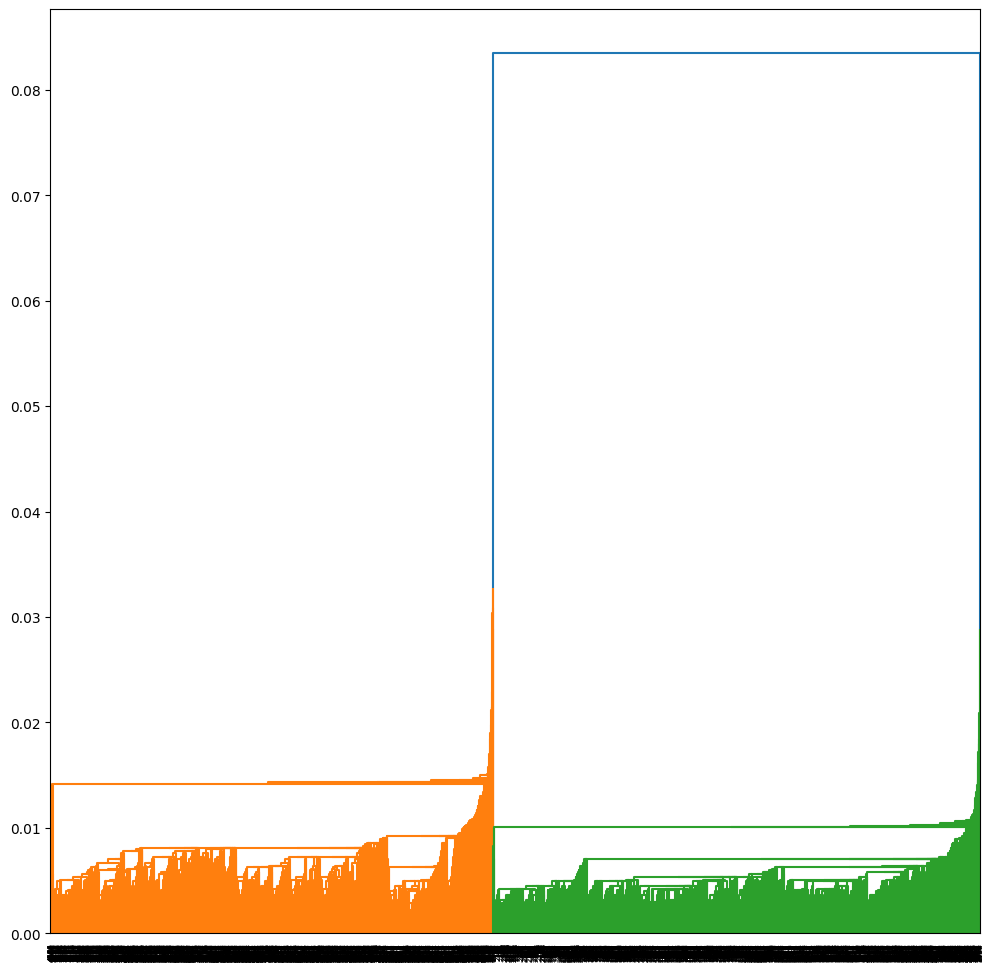

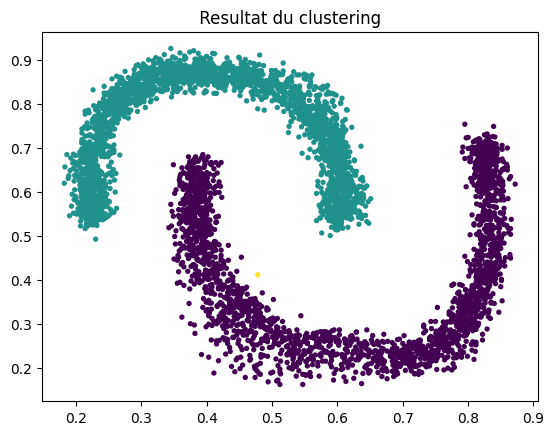

nb clusters = 3 , nb feuilles =  4811  runtime =  126.34 ms

 ------------------
banana.arff

 ---> k =  4
Dendrogramme 'single' donnees initiales


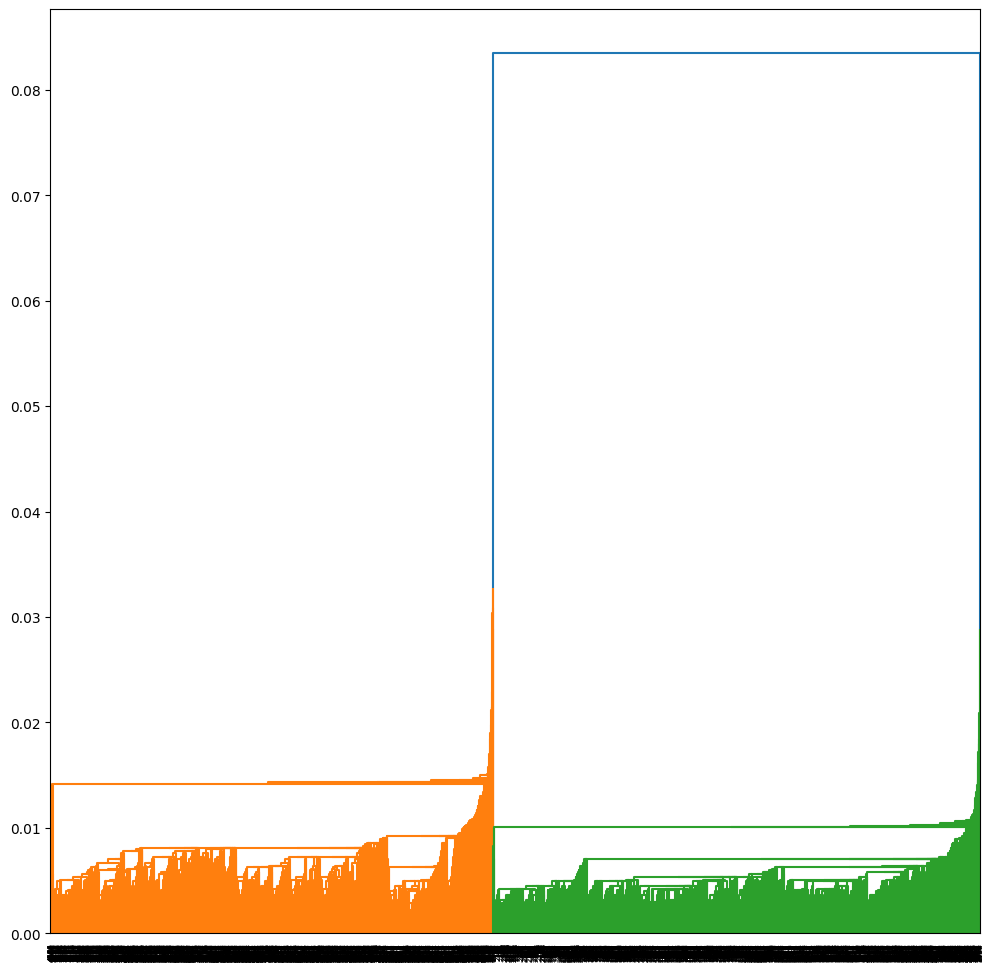

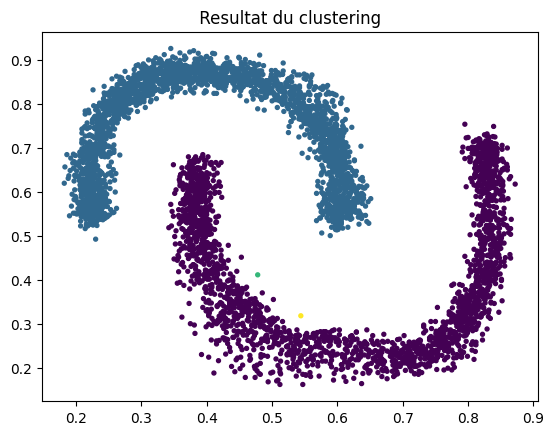

nb clusters = 4 , nb feuilles =  4811  runtime =  103.55 ms

 ------------------
banana.arff

 ---> k =  5
Dendrogramme 'single' donnees initiales


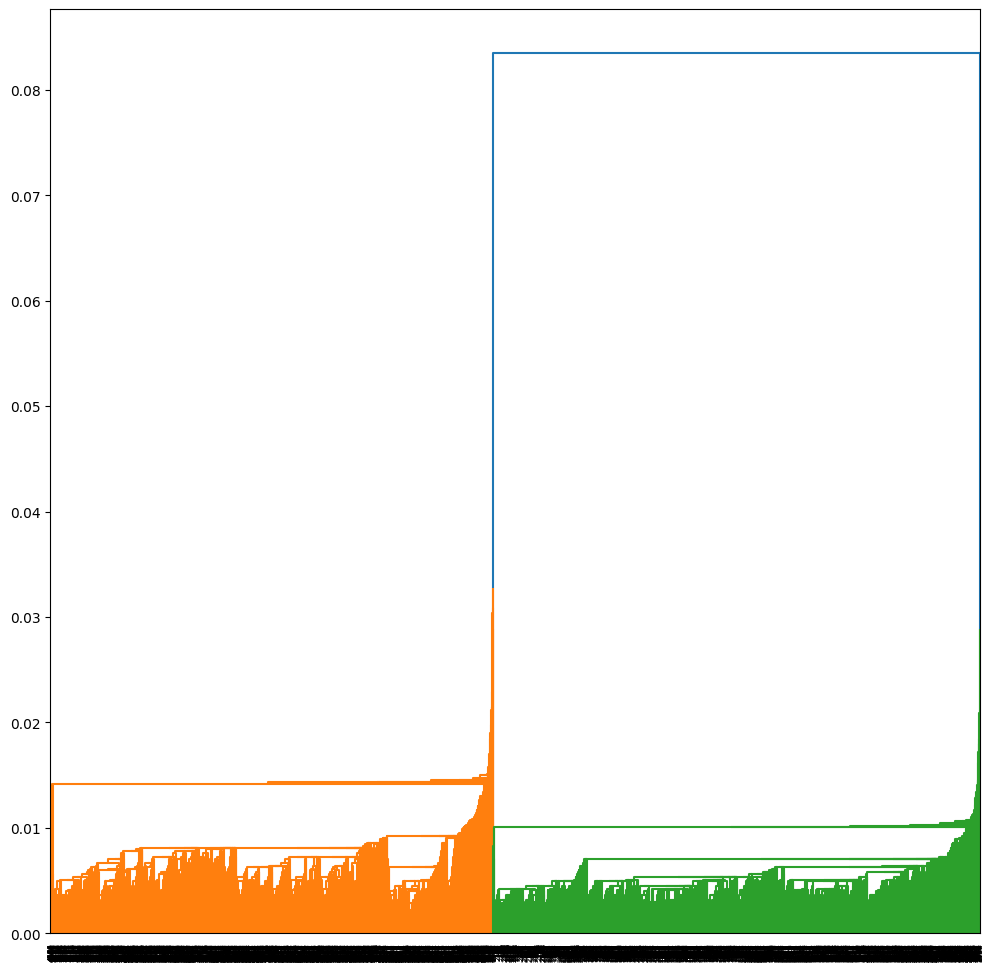

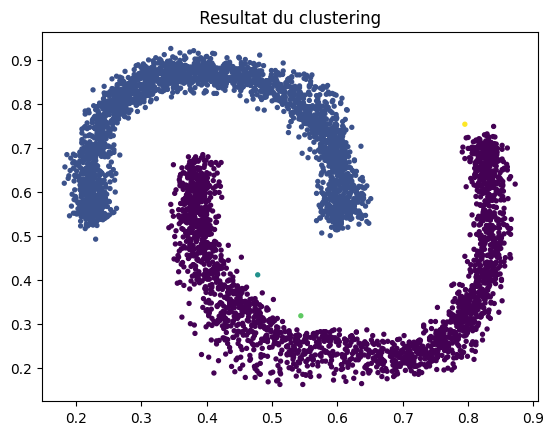

nb clusters = 5 , nb feuilles =  4811  runtime =  100.58 ms

 ------------------
flame.arff

 ---> k =  2
Dendrogramme 'single' donnees initiales


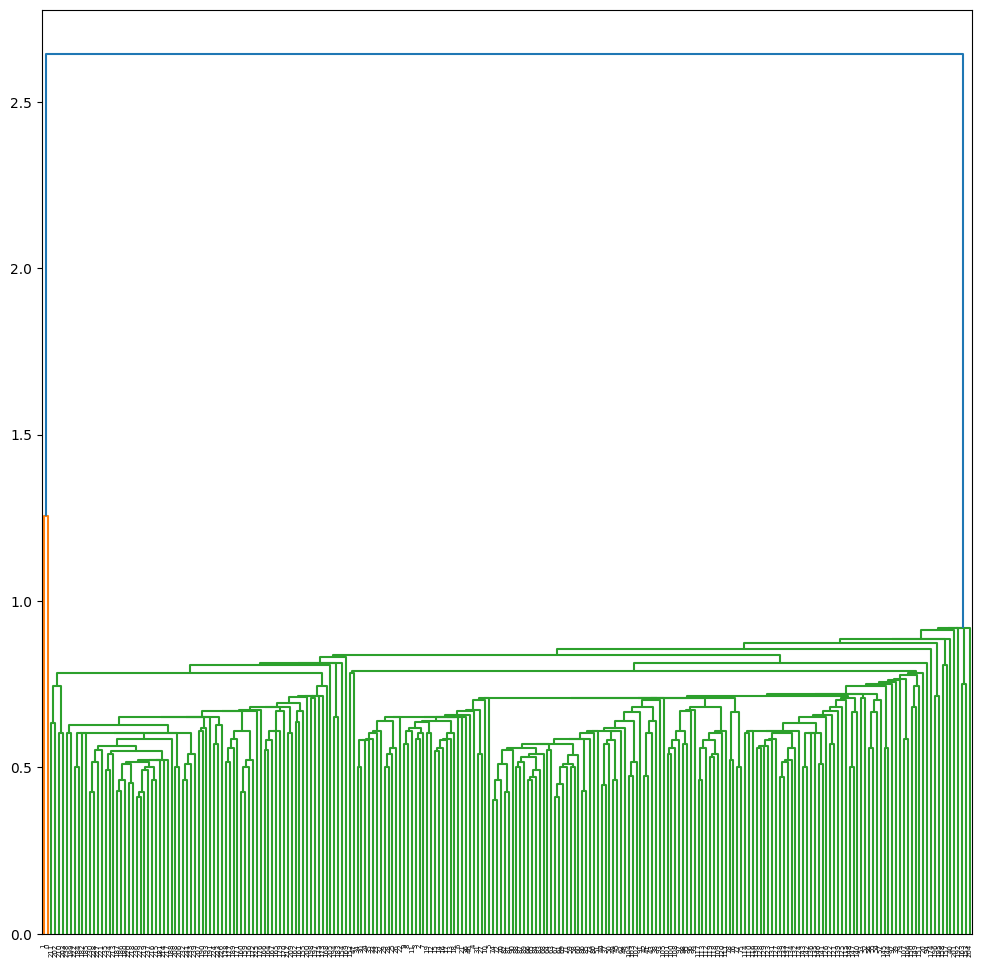

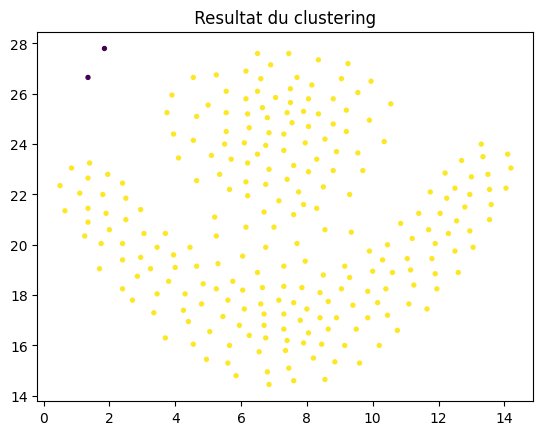

nb clusters = 2 , nb feuilles =  240  runtime =  1.61 ms

 ------------------
flame.arff

 ---> k =  3
Dendrogramme 'single' donnees initiales


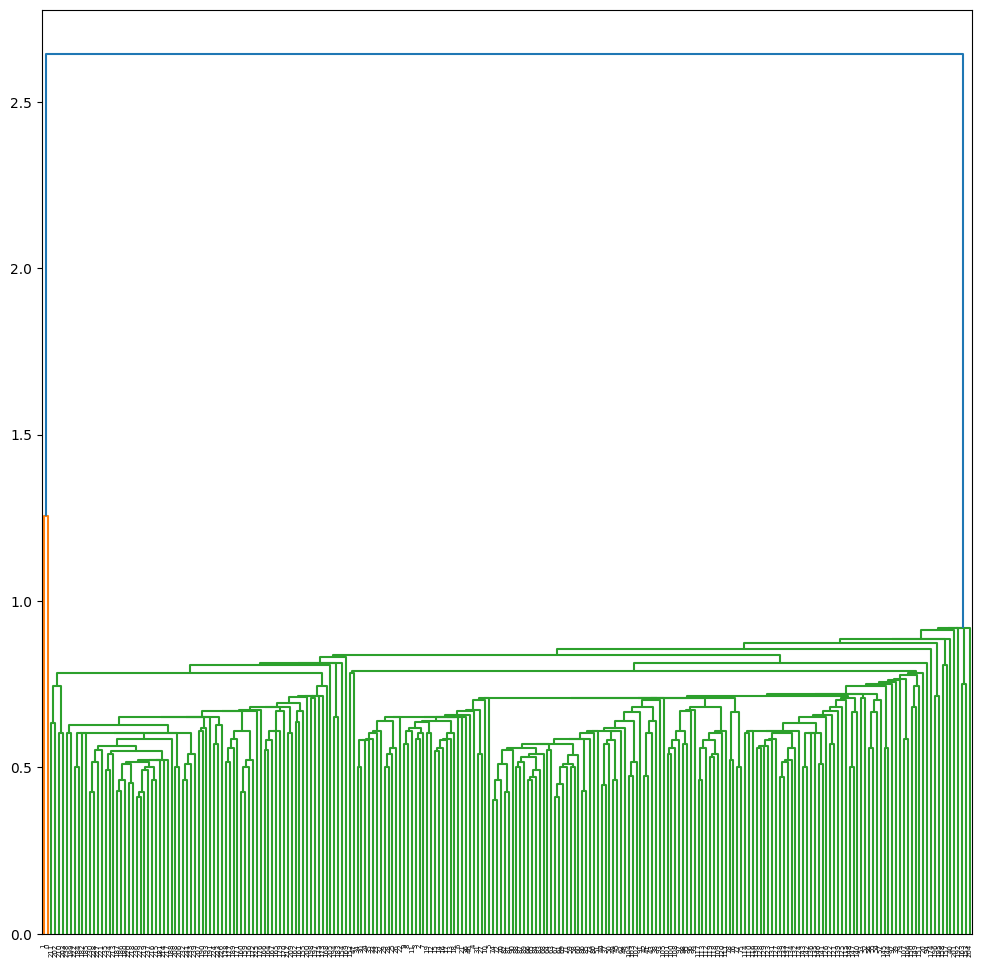

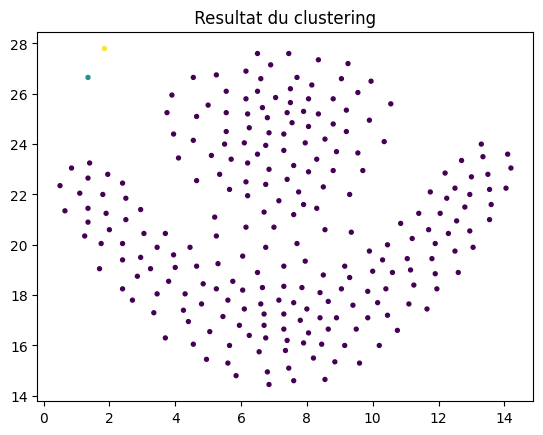

nb clusters = 3 , nb feuilles =  240  runtime =  1.76 ms

 ------------------
flame.arff

 ---> k =  4
Dendrogramme 'single' donnees initiales


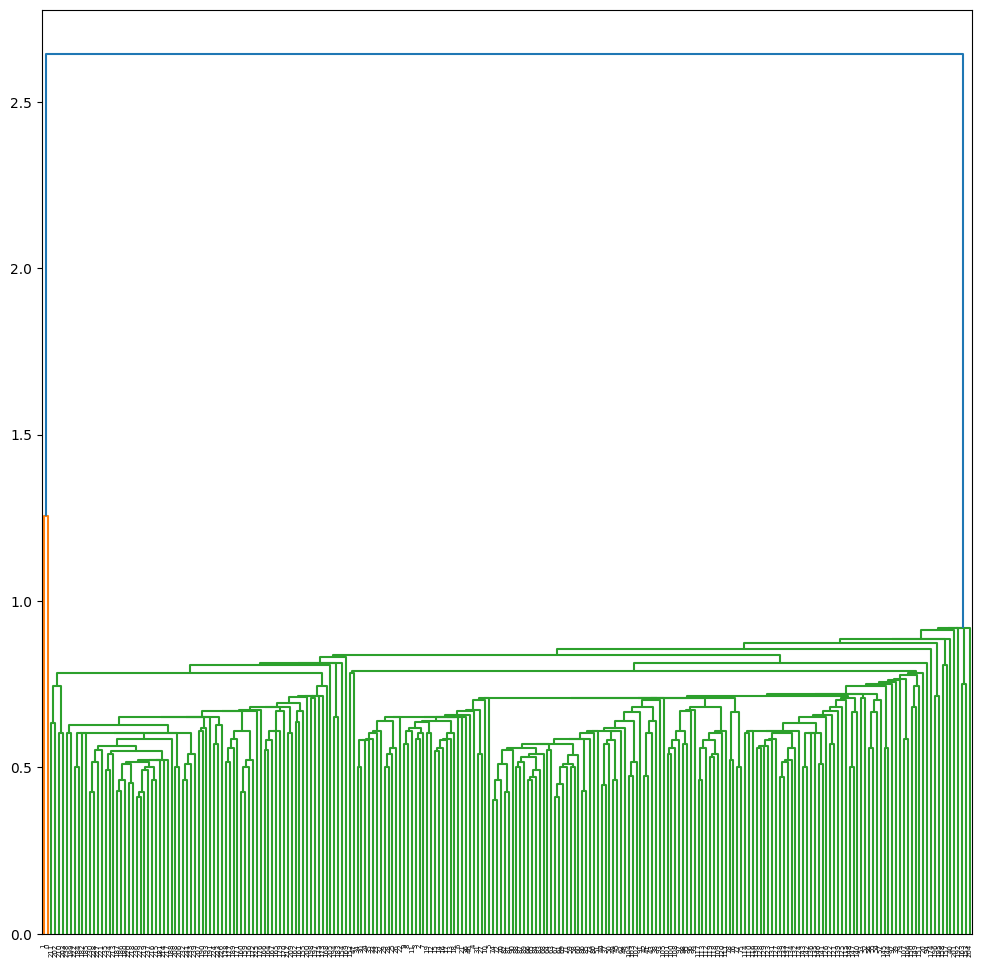

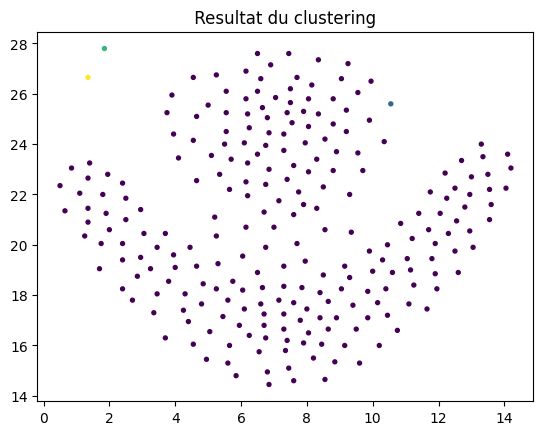

nb clusters = 4 , nb feuilles =  240  runtime =  1.55 ms

 ------------------
flame.arff

 ---> k =  5
Dendrogramme 'single' donnees initiales


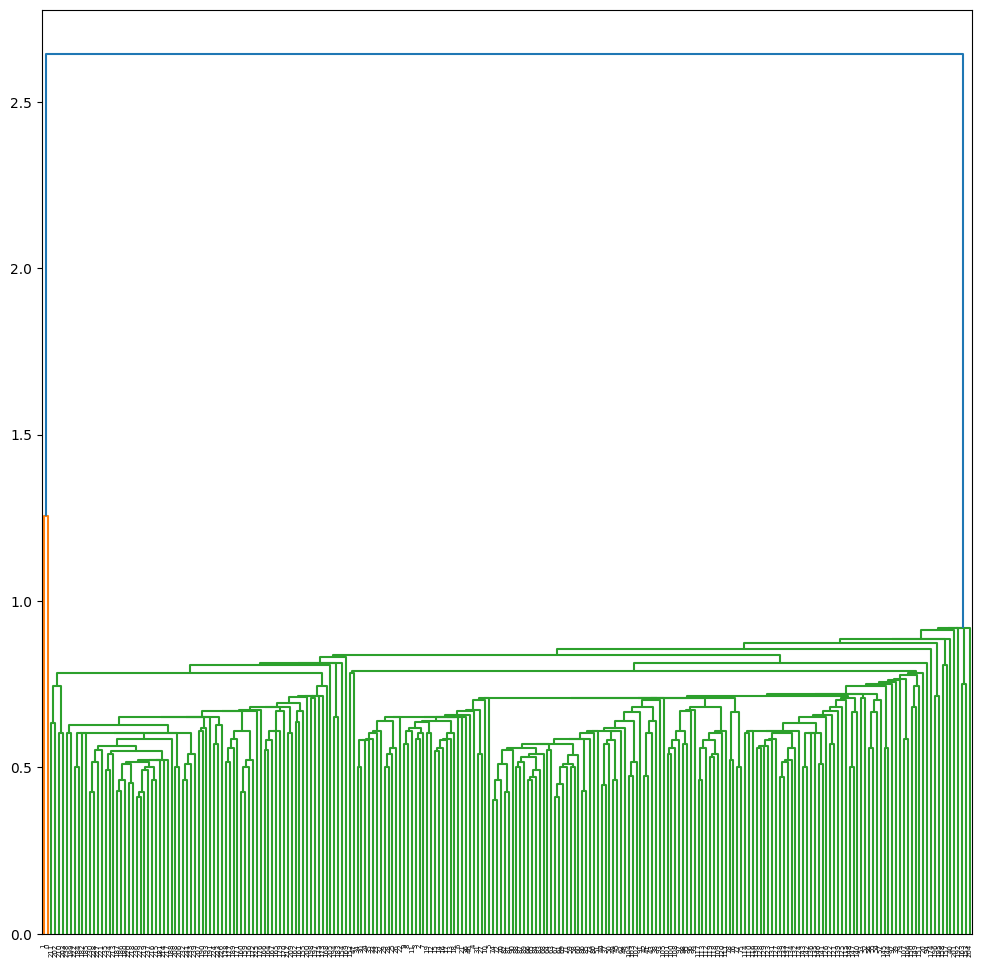

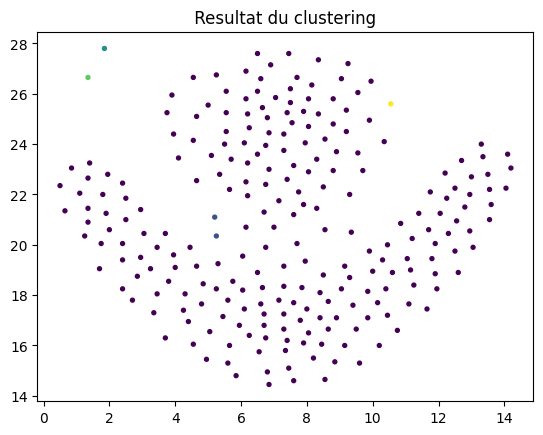

nb clusters = 5 , nb feuilles =  240  runtime =  1.5 ms

 ------------------
flame.arff

 ---> k =  6
Dendrogramme 'single' donnees initiales


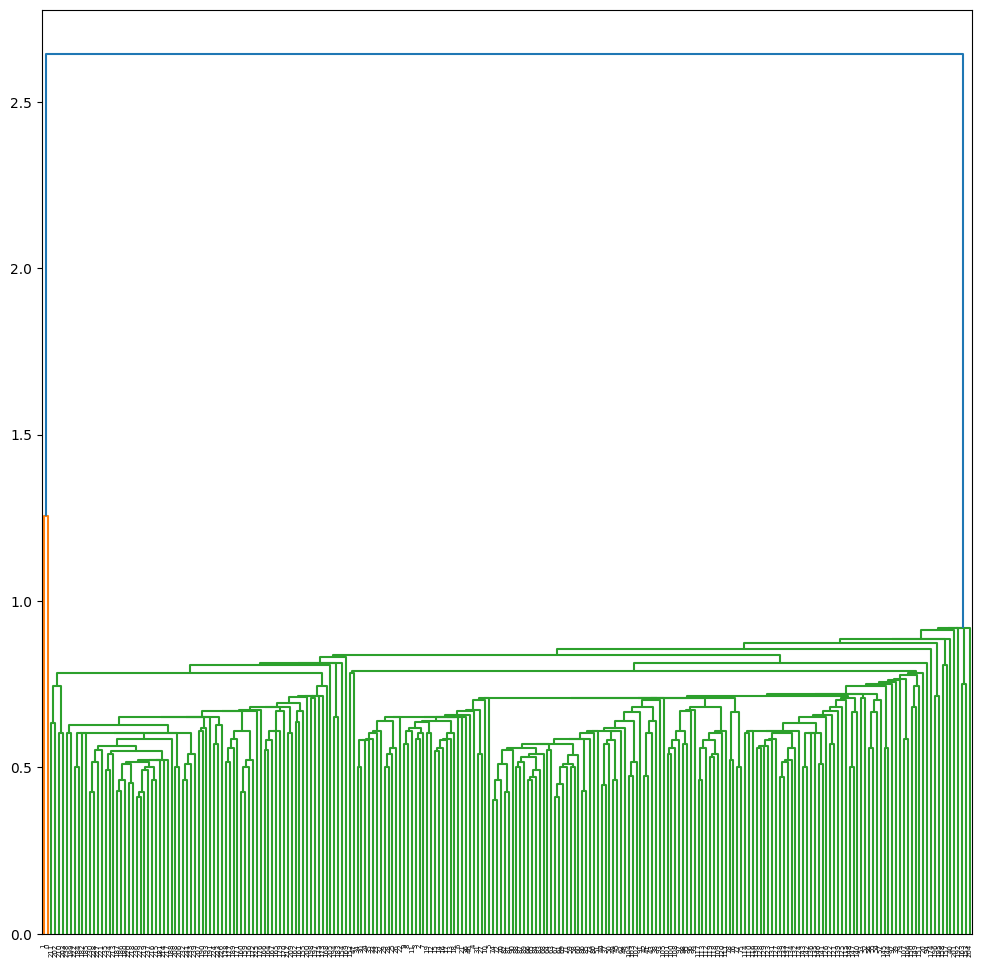

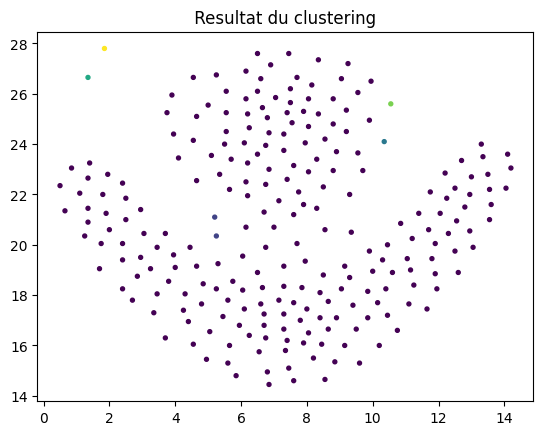

nb clusters = 6 , nb feuilles =  240  runtime =  1.47 ms

 ------------------
flame.arff

 ---> k =  7
Dendrogramme 'single' donnees initiales


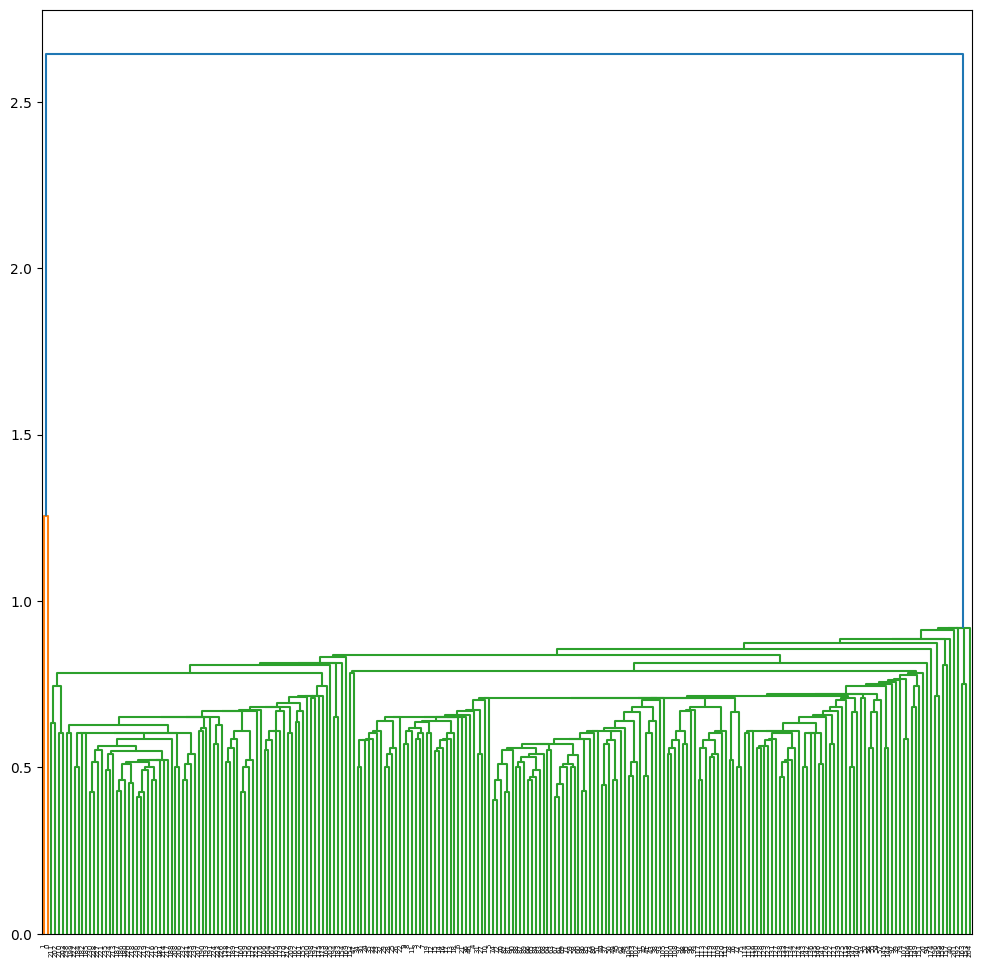

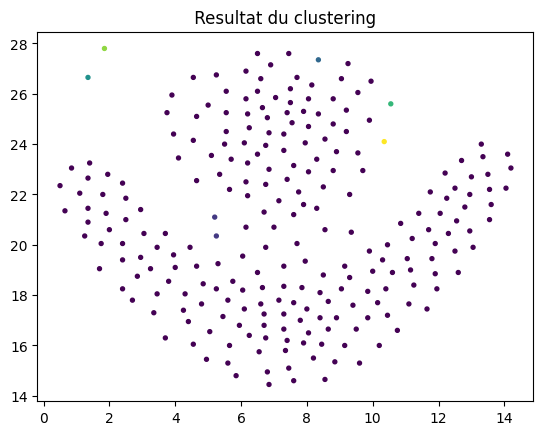

nb clusters = 7 , nb feuilles =  240  runtime =  1.49 ms

 ------------------
smile1.arff

 ---> k =  2
Dendrogramme 'single' donnees initiales


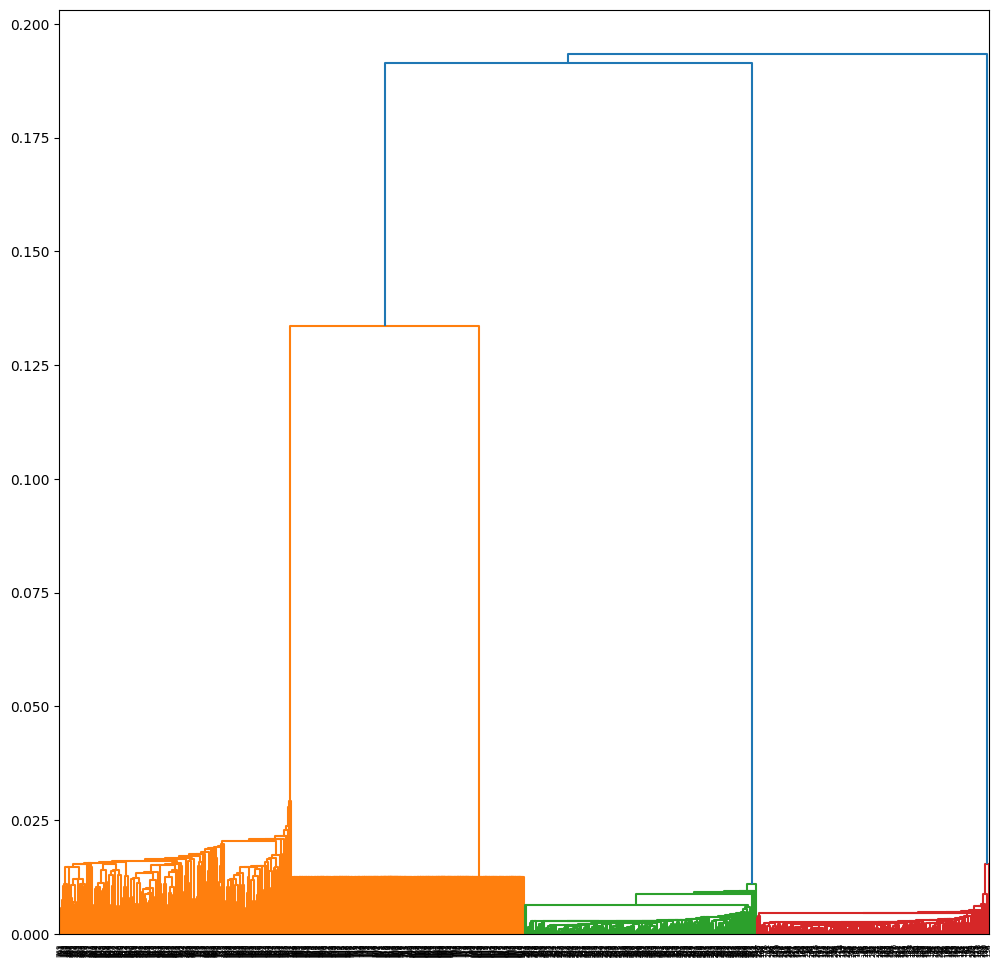

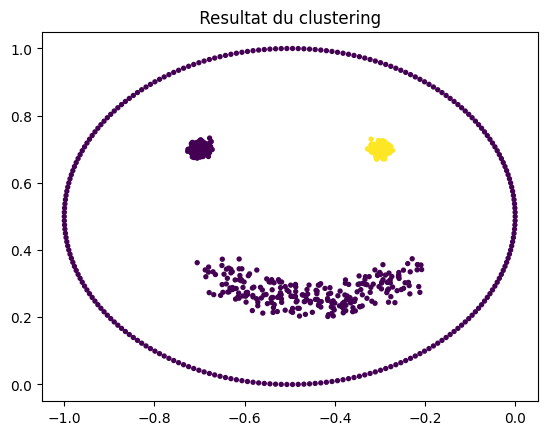

nb clusters = 2 , nb feuilles =  1000  runtime =  6.93 ms

 ------------------
smile1.arff

 ---> k =  3
Dendrogramme 'single' donnees initiales


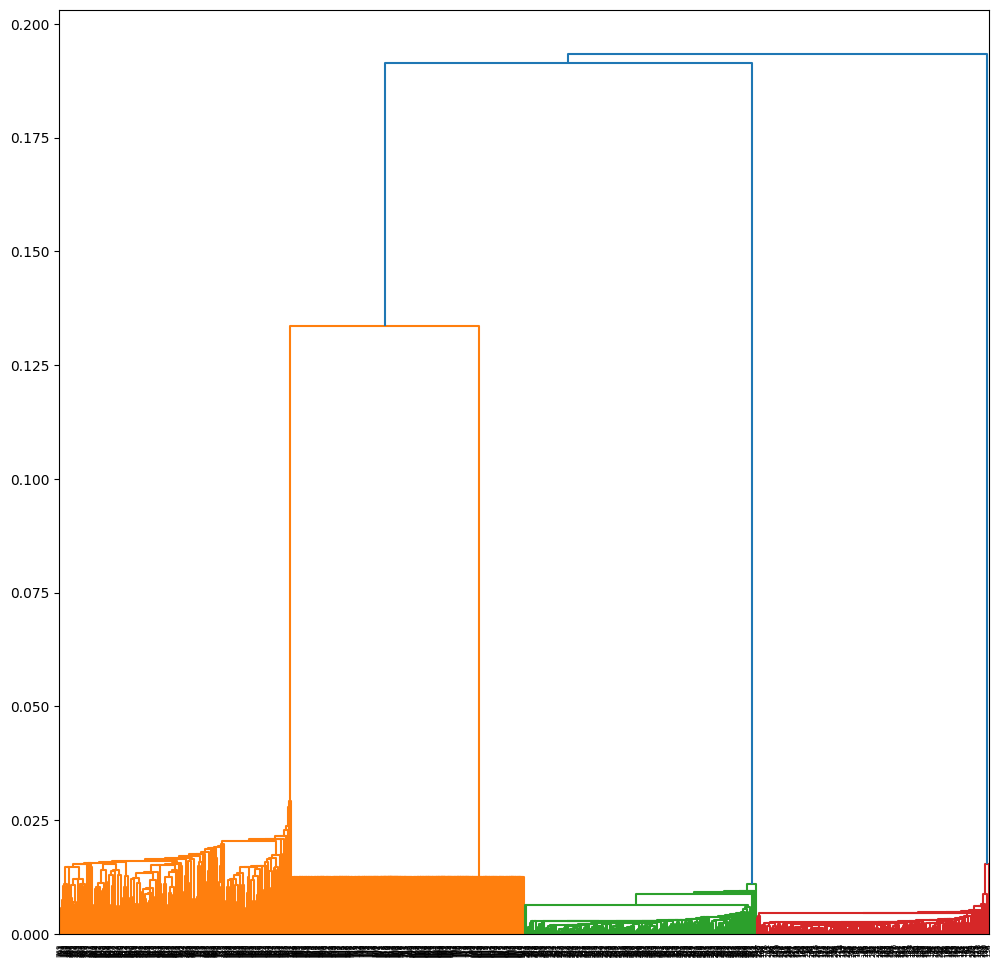

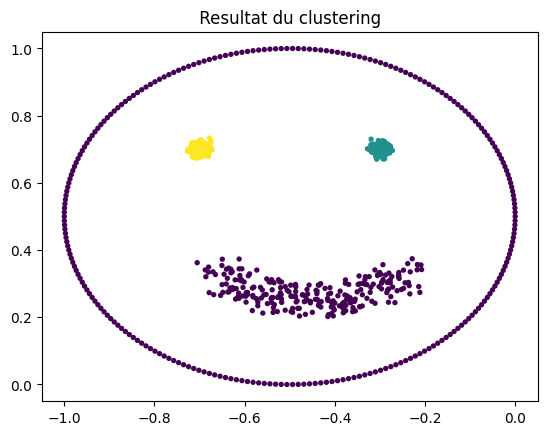

nb clusters = 3 , nb feuilles =  1000  runtime =  7.57 ms

 ------------------
smile1.arff

 ---> k =  4
Dendrogramme 'single' donnees initiales


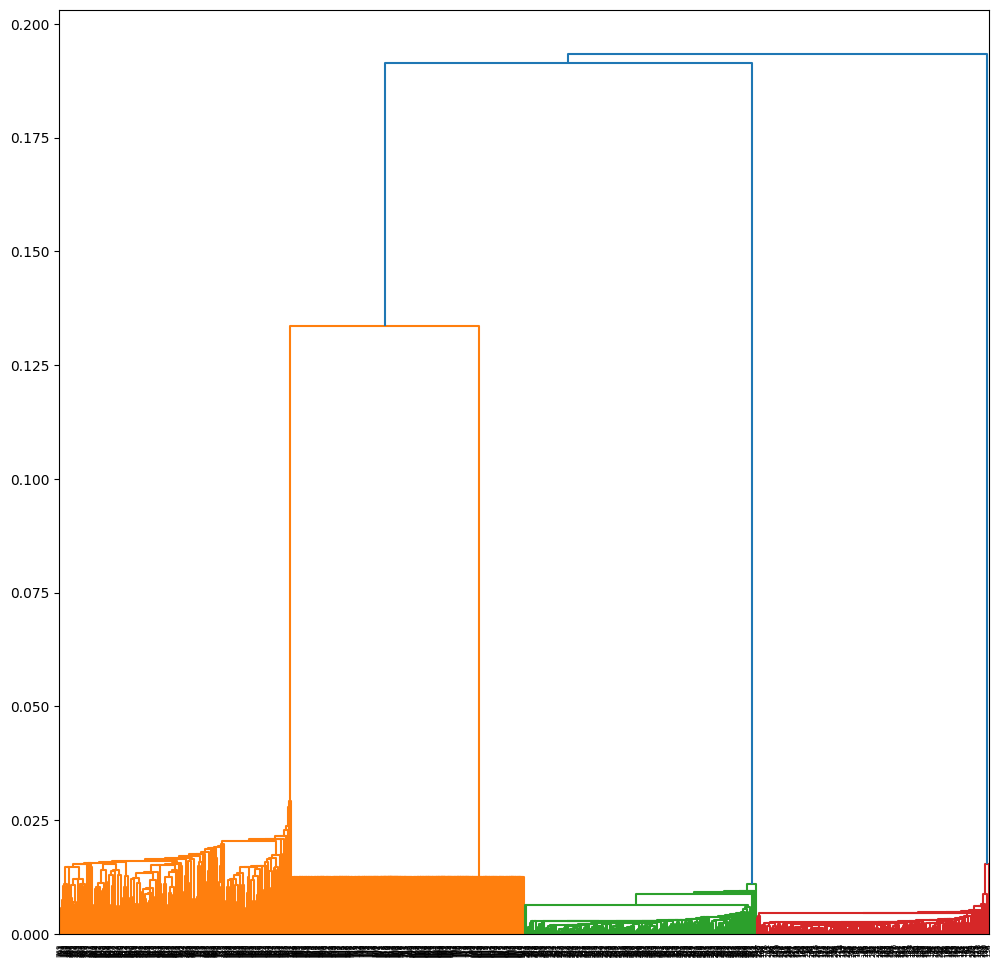

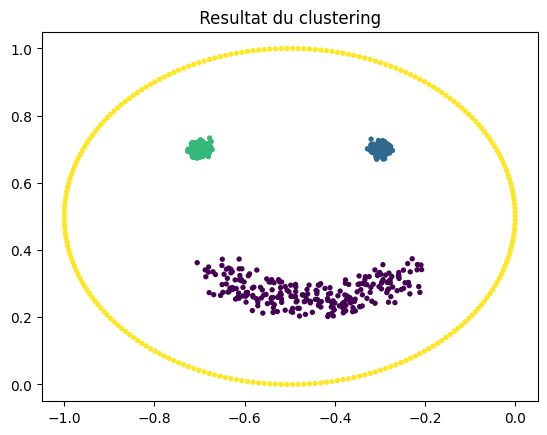

nb clusters = 4 , nb feuilles =  1000  runtime =  6.92 ms

 ------------------
smile1.arff

 ---> k =  5
Dendrogramme 'single' donnees initiales


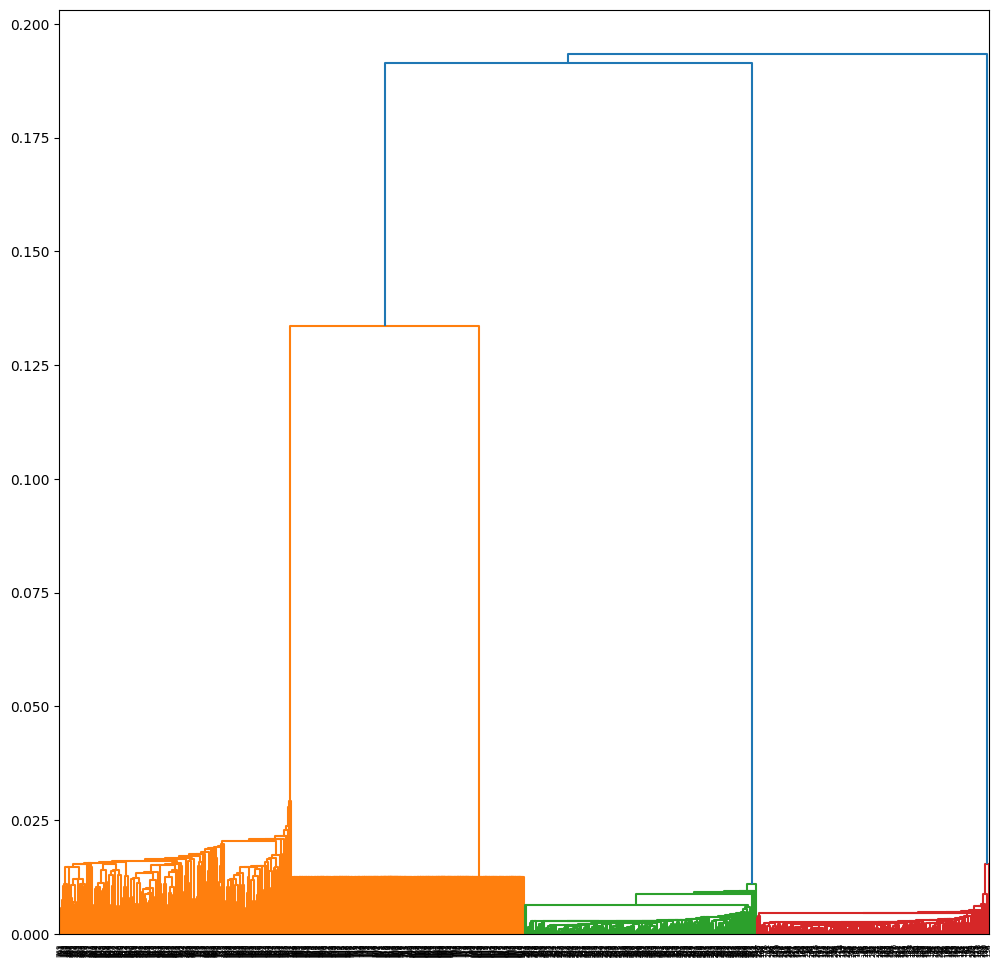

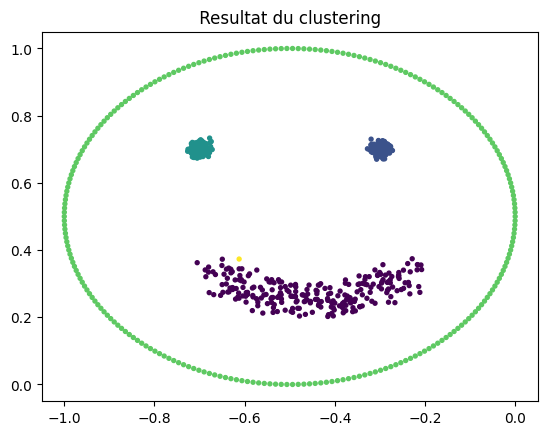

nb clusters = 5 , nb feuilles =  1000  runtime =  6.82 ms

 ------------------
smile1.arff

 ---> k =  6
Dendrogramme 'single' donnees initiales


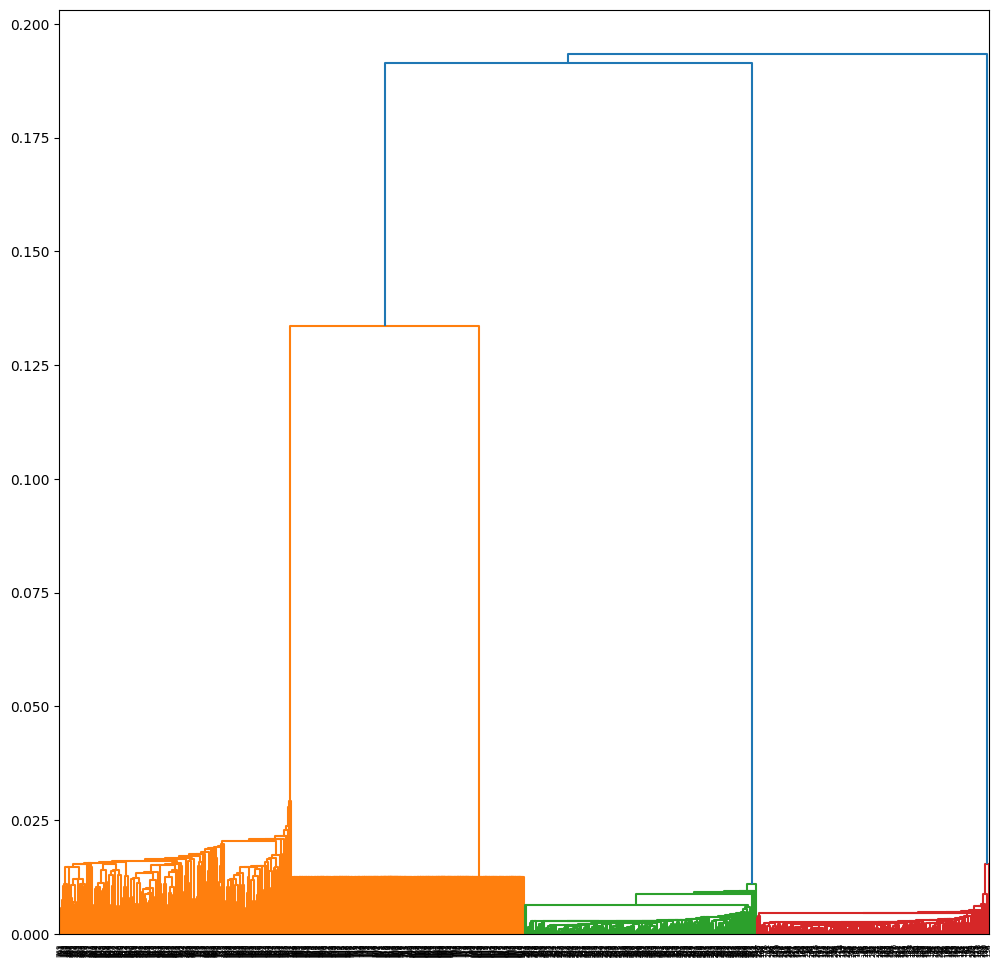

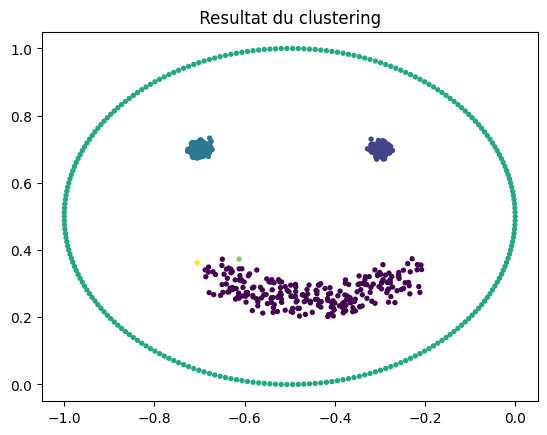

nb clusters = 6 , nb feuilles =  1000  runtime =  6.85 ms


In [26]:
dict = {"banana.arff":[2,[2, 3, 4, 5]], "flame.arff":[3,[2, 3, 4, 5, 6, 7]], "smile1.arff":[2,[2, 3, 4, 5, 6]]}

for key in dict:
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    for k in dict[key][1]:
        print("\n ------------------")
        print(key)
        print("\n ---> k = ", k)
        # Donnees dans datanp
        print ("Dendrogramme 'single' donnees initiales")
        linked_mat = shc.linkage ( datanp , 'single')
        plt.figure ( figsize =( 12 , 12 ) )
        shc.dendrogram ( linked_mat ,
            orientation ='top',
            distance_sort ='descending',
            show_leaf_counts = False )
        plt.show ()

        # set the number of clusters
        tps1 = time.time ()
        model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
        model = model.fit (datanp)
        tps2 = time.time ()
        labels = model.labels_
        kres = model.n_clusters_
        leaves = model.n_leaves_

        # Affichage clustering
        plt.scatter (f0,f1 , c=labels , s=8 )
        plt.title (" Resultat du clustering ")
        plt.show ()
        print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")




### 3.3 Limites de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering agglométarif aura des difficultés pour identifier correctement les clusters.

Appliquez la méthode de clustering agglomératif sur ces jeux de données pour confirmer vos choix.

In [ ]:
# like above but changing the file like tetra.arff

### 3.4 Comparaison de méthodes de clustering

Proposez une comparaison des résultats obtenus par les méthodes k-means, k-medoids et clustering agglomératif.

In [25]:
# Comparer k-means, k-medoids and clustering agglomératif in terms of evaluate_score

# Path: clustering_kmeans.ipynb
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
# Pour k = 3, comparez les résultats obtenus par k-means et k-medoids à l'aide d'indicateurs comme rand_score ou mutual_information

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, mutual_info_score
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances

databrut = arff.loadarff(open(path+"spiral.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

k = 2

data_with_label = [[x[0], x[1], x[2]] for x in databrut[0]]
# print(data_with_label)

true_labels = [int(x[2]) for x in data_with_label]

# print("Les vrais labels sont : ", true_labels)

# k-means
kmeans_model = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans_labels = kmeans_model.fit_predict(datanp)
kmeans_rand_score = rand_score(true_labels, kmeans_labels)
kmeans_mutual_info = mutual_info_score(true_labels, kmeans_labels)

# k-medoids
distmatrix = euclidean_distances(datanp)
kmedoids_model = kmedoids.KMedoids(n_clusters=k, random_state=0)
kmedoids_model.fit(distmatrix)
kmedoids_labels = kmedoids_model.labels_
kmedoids_rand_score = rand_score(true_labels, kmedoids_labels)
kmedoids_mutual_info = mutual_info_score(true_labels, kmedoids_labels)

# clustering agglomeratif
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit (datanp)
labels = model.labels_
kres = model.n_clusters_

print()
print("Résultats pour k = 3:")
print("K-means Rand Score:", kmeans_rand_score)
print("K-means Mutual Information:", kmeans_mutual_info)
print("K-medoids Rand Score:", kmedoids_rand_score)
print("K-medoids Mutual Information:", kmedoids_mutual_info)
print("Agglomeratif Rand Score:", rand_score(true_labels, labels))
print("Agglomeratif Mutual Information:", mutual_info_score(true_labels, labels))

# Agglomératif est meilleur que k-means et k-medoids quand c'est bien séparé mais sinon, il est moins bon.


Résultats pour k = 3:
K-means Rand Score: 0.5150030030030031
K-means Mutual Information: 0.015568966874206058
K-medoids Rand Score: 0.5228508508508508
K-medoids Mutual Information: 0.023512871011099445
Agglomeratif Rand Score: 1.0
Agglomeratif Mutual Information: 0.6931471805599454
